# MILESTONE 2

### Name : Muhammad Irsyad Rafif
### Batch : HCK-013

### Objective:

The goal of this project is to analyze bank churner by classifying them with the approptiate model with an end outcome to make a model that will predict if the potential customer or current customer will churn or not.


========================================================================================================================================

## 1. Import Liblaries

In [1]:
# Import Liblaries for Data Manipulation
import pandas as pd
import numpy as np
from scipy import stats

# Liblaries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Liblaries for Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from feature_engine.outliers import Winsorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import  SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import warnings
from sklearn.exceptions import FitFailedWarning

# Ignore FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Model Saving
import pickle

In [2]:
# Load 10 Data
data = pd.read_csv('BankChurners.csv')

# Make data into a DataFrame
df = pd.DataFrame(data)

# Show the first 10 data
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,0,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,1,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,0,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,1,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,0,44,0,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,0,51,0,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,0,32,0,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,0,37,0,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,0,48,0,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [3]:
# Show the last 10 data
df.tail(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10117,712503408,0,57,0,2,Graduate,Married,$80K - $120K,Blue,40,...,3,4,17925.0,1909,16016.0,0.712,17498,111,0.820,0.106
10118,713755458,1,50,0,1,Unknown,Unknown,$80K - $120K,Blue,36,...,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096
10119,716893683,1,55,1,3,Uneducated,Single,Unknown,Blue,47,...,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172
10120,710841183,0,54,0,1,High School,Single,$60K - $80K,Blue,34,...,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
10121,713899383,0,56,1,1,Graduate,Single,Less than $40K,Blue,50,...,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
10122,772366833,0,50,0,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,0,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,1,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,0,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,1,43,1,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [4]:
# Show data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

There are a total of 21 columns, with the data type of float, interger, and string.

CLIENTNUM is a the primary key in the table so it will be dropped during analysis.                                                                                                                    

## 2. Exploratory Data Analysis

### 2.1 Study Case/Problem Statement

In this Scenario i am a data scientist working in SBank where safety and satisfaction is guranteeed (Made up bank). Our bank prioritize customer satisfaction by looking at the customer rentention and customer churn rate. We can see from the data gather last year which is 2023 that there are some customers that  has churned.

I am tasked by Sbank to analyze and predict potential customers that might/already left in order for Sbank marketing team and sales team to mitiagete a potential attrition of our users. With the goal to lower costomer churn by 5%


### 2.2 Dataset Description

| NO. | Column Name               | Description                                             |
|----:|---------------------------|---------------------------------------------------------|
|   1 | CLIENTNUM                 | Client number. Unique identifier for the customer holding the account. |
|   2 | Attrition_Flag            | Internal event (customer activity) variable - if the account is closed then 1 else 0. |
|   3 | Customer_Age              | Demographic variable - Customer's Age in Years.          |
|   4 | Gender                    | Demographic variable - 0=Male, 1=Female.                  |
|   5 | Dependent_count           | Demographic variable - Number of dependents.              |
|   6 | Education_Level           | Demographic variable - Educational Qualification of the account holder (example: high school). |
|   7 | Marital_Status            | Demographic variable - Married, Single, Divorced, Unknown. |
|   8 | Income_Category           | Demographic variable - Annual Income Category of the account holder. |
|   9 | Card_Category             | Product Variable - Type of Card (Blue, Silver, Gold, Platinum). |
|  10 | Months_on_book            | Period of relationship with bank.                        |
|  11 | Total_Relationship_Count  | Total no. of products held by the customer.              |
|  12 | Months_Inactive_12_mon    | No. of months inactive in the last 12 months.            |
|  13 | Contacts_Count_12_mon     | No. of Contacts in the last 12 months.                   |
|  14 | Credit_Limit              | Credit Limit on the Credit Card.                          |
|  15 | Total_Revolving_Bal       | Total Revolving Balance on the Credit Card.              |
|  16 | Avg_Open_To_Buy           | Open to Buy Credit Line (Average of last 12 months).    |
|  17 | Total_Amt_Chng_Q4_Q1      | Open to Buy Credit Line (Average of last 12 months).    |
|  18 | Total_Trans_Amt           | Total Transaction Amount (Last 12 months).              |
|  19 | Total_Trans_Ct            | Total Transaction Count (Last 12 months).               |
|  20 | Total_Ct_Chng_Q4_Q1       | Change in Transaction Count (Q4 over Q1).               |
|  21 | Avg_Utilization_Ratio     | Average Card Utilization Ratio.                          |


In [5]:
# Make a copy of dataframe for analysis
copy_df = df.copy()

A copy of the dataset has been made

### 2.2 Missing Value Check

In [6]:
# Finding Null data in the dataset
copy_df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

There are no missing value in the dataset, but after looking at the first and last 10 values there are some values that are listed as 'Unknown', even if it is not treated as a null value it is listed as a null value, we will analyze these Unknown values further.

In [7]:
# Filter the DataFrame to show only rows with 'Unknown' values
unknown_rows = copy_df[copy_df.isin(['Unknown']).any(axis=1)]

# Display the resulting DataFrame
unknown_rows

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3,769911858,0,40,1,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
6,810347208,0,51,0,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,0,32,0,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
10,708790833,0,42,0,5,Uneducated,Unknown,$120K +,Blue,31,...,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
11,710821833,0,65,0,1,Unknown,Married,$40K - $60K,Blue,54,...,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10101,718372458,0,42,0,2,Graduate,Unknown,$40K - $60K,Blue,30,...,2,5,3735.0,1723,2012.0,0.595,14501,92,0.840,0.461
10118,713755458,1,50,0,1,Unknown,Unknown,$80K - $120K,Blue,36,...,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096
10119,716893683,1,55,1,3,Uneducated,Single,Unknown,Blue,47,...,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172
10123,710638233,1,41,0,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511


Based on perliminary analysis we do not see a pattern on the dataset, there are a total of 3046 missing values, we will see using a heatmap if there are any pattern.

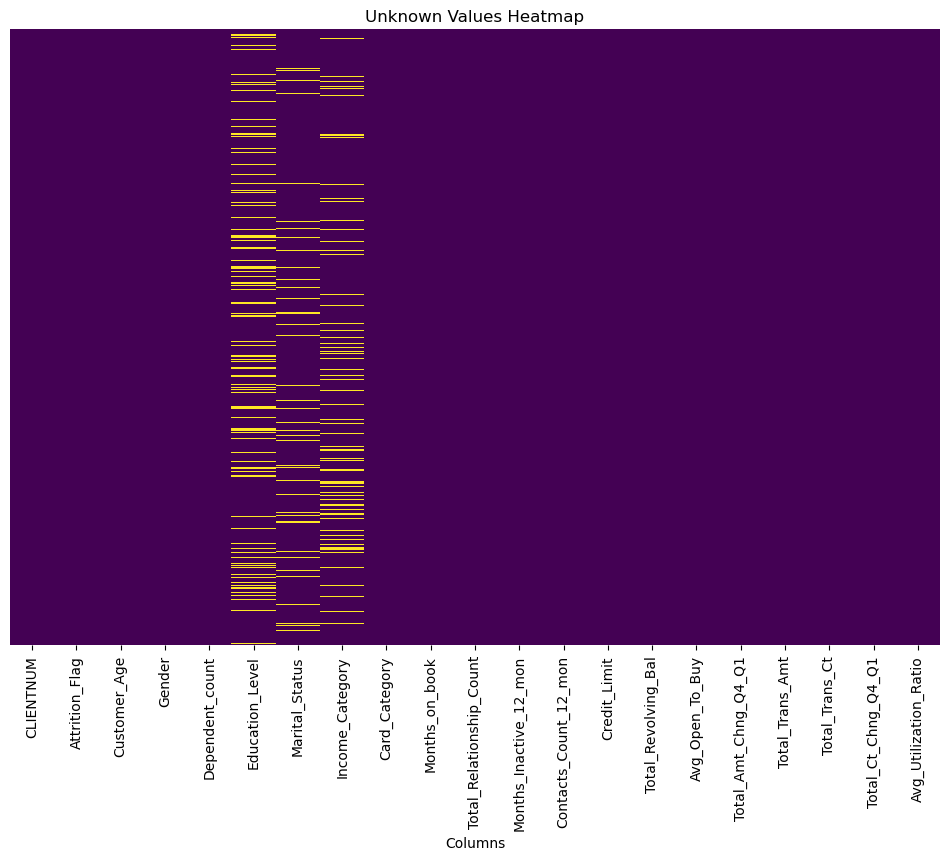

In [8]:
# Identifying values with Unknown
unknown_values_mask = copy_df == 'Unknown'

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(unknown_values_mask, cmap='viridis', cbar=False, yticklabels=False)

# Add labels and title
plt.xlabel('Columns')
plt.title('Unknown Values Heatmap')

# Show the plot
plt.show()

We can see that the Unkown Values are only in the Education_Level, Martial_Status, and Income Catagory and based on the heat map there are no visible pattern that we can see hence we can say that the data is **Missing Compleatly at Random**, since **the missing value represent 30% of our data**, we will not drop them, instead conduct a random impuration. Below are the code for the random imputation.

Random Imputation will be done after split train test.

### 2.3 Duplicate Value Check

In [9]:
# Finding duplicate Value in the dataset.
copy_df.duplicated().sum()

0

There are no duplicate value in the dataset, so there will be no need to do duplicate value handling.

### 2.4 Attrition Count

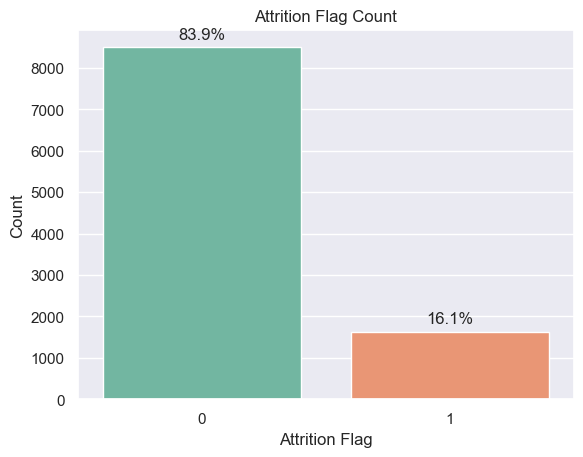

In [10]:
# Count plot with Seaborn
sns.set(style="darkgrid")  # Optional: Set the style
ax = sns.countplot(x='Attrition_Flag', data=copy_df, palette='Set2')

plt.title('Attrition Flag Count')
plt.xlabel('Attrition Flag')
plt.ylabel('Count')

# Calculate percentages
total_count = len(copy_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.02 * total_count
    ax.annotate(percentage, (x, y), ha='center')

# Display the plot
plt.show()

We can see that there are more existing customers than attributed customers, which means that the data is imbalance, hence we have to handle this before modeling.

other things we can gain with this insight is that: 
- From 10127 users, there are only 16.1 % that are attributed/left which is a healthy amount of churn rate for our company, but we as a company want to further analyze potential users that will leave us.

- For the modeling of our prediction the data is imbalanced thus we will balance them using SMOTE oversample before modeling.

### 2.5 Customer Age Distribution and Card Catagory

c:\Users\Irsyad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


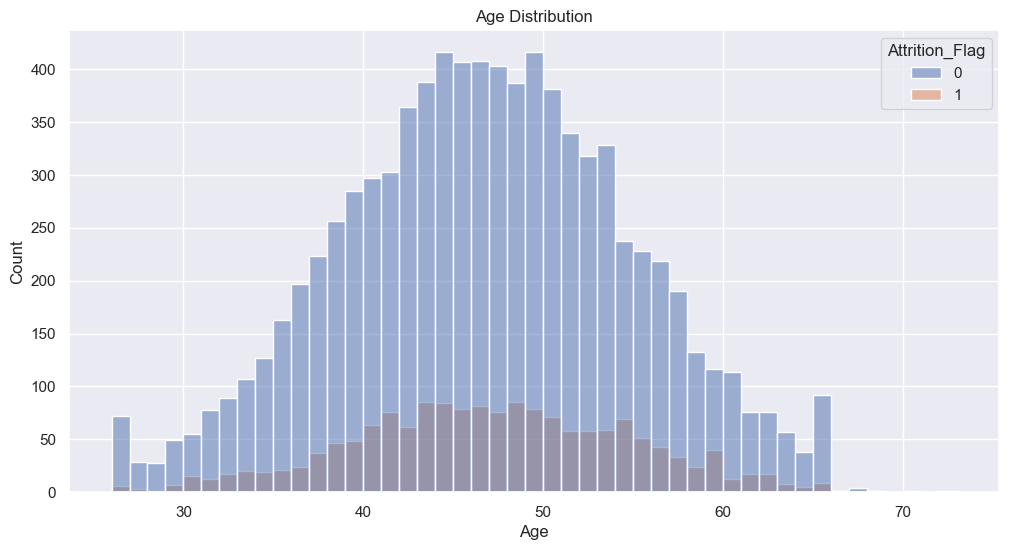

In [11]:
# Set the style (optional)
sns.set(style="darkgrid")

# Create a larger figure
plt.figure(figsize=(12, 6))

# Create the histogram
ax = sns.histplot(x='Customer_Age', data=copy_df, hue='Attrition_Flag', palette='deep')

# Set title and labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Display the plot
plt.show()

Based on the graph we can see that:

- Age is normally distributed, with the most users being aroung 48 years old and the least being above 60
- Majority of users are still using our service, around 16% - 25% of each age group are attributed

Bussines Insight : 

- We can provide financial stability anfd planning, people at the age of 40 to 50 usualy prioritize financial stability and planning become more important  thus we can provide them with the necessary assistance.
- Long term reward benefits can be given to users that has been with as for a long period of time which can reduce potential churn rate.

### 2.6 Dependancy Count and Attrition

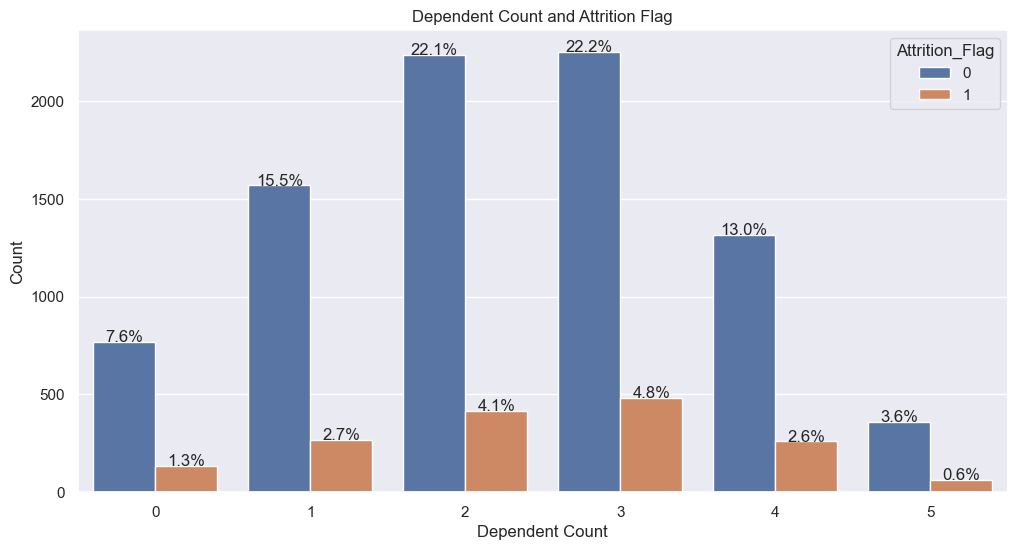

In [12]:
# Set the style
sns.set(style="darkgrid")

# Create a larger figure
plt.figure(figsize=(12, 6))

# Create the count plot with hue
ax = sns.countplot(x='Dependent_count', data=copy_df, hue='Attrition_Flag', palette='deep')

# Calculate the percentage of each hue category
total = len(copy_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            '{:.1%}'.format(height / total),
            ha="center")

# Set title and labels
plt.title('Dependent Count and Attrition Flag')
plt.xlabel('Dependent Count')
plt.ylabel('Count')

# Display the plot
plt.show()

Before going into the graph analysis we will explain a bit on dependent_count.

Dependant_Count refers to the number of people who are financialy dependant to the user (example a father with two kids has a dependant count of 2 or 3 ( 3 if the wife is included)).

Based in the graph abive we can say that :
- Majority of your users has a dependancy of around 2 or 3 people and the least being 5 dependence count.
- Majority of users are still using our service, around 16% - 25% of each dependence group are attributed/churn

Bussiness Insight :
- We can provide family oriented services towards users that has a dependancy of 1 or higher like a joint accoutn to reduce churn rate
- A reward program that i family oriented like educational resources, financial planning tools, ect.

### 2.7 Inactivity within 12 Months and Attrition

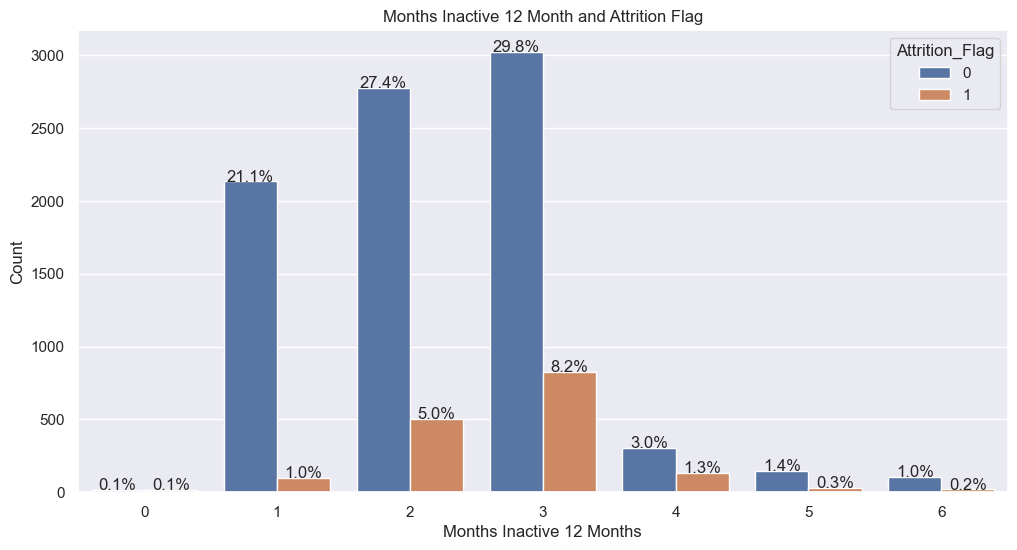

In [13]:
# Set the style
sns.set(style="darkgrid")

# Create a larger figure
plt.figure(figsize=(12, 6))

# Create the count plot with hue
ax = sns.countplot(x='Months_Inactive_12_mon', data=copy_df, hue='Attrition_Flag', palette='deep')

# Calculate the percentage of each hue category
total = len(copy_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            '{:.1%}'.format(height / total),
            ha="center")

# Set title and labels
plt.title('Months Inactive 12 Month and Attrition Flag')
plt.xlabel('Months Inactive 12 Months')
plt.ylabel('Count')

# Display the plot
plt.show()

Based on the graoh above we can say that:
- users are still in contact with use around 2 - 3 months with the highest being 3 months
- there are almost no users around 1 which means that they are still in contact with us on after the frist month.
- around 3 moths the attrition is at it's highest at 8.2%.


### 2.8 Contact with bank within 12 Months and Attrition

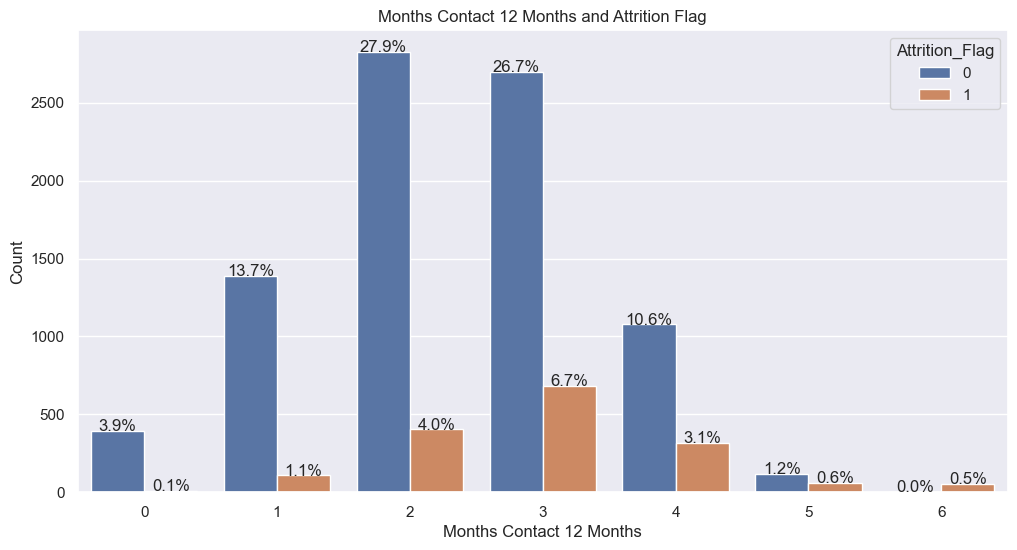

In [14]:
# Set the style
sns.set(style="darkgrid")

# Create a larger figure
plt.figure(figsize=(12, 6))

# Create the count plot with hue
ax = sns.countplot(x='Contacts_Count_12_mon', data=copy_df, hue='Attrition_Flag', palette='deep')

# Calculate the percentage of each hue category
total = len(copy_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            '{:.1%}'.format(height / total),
            ha="center")

# Set title and labels
plt.title('Months Contact 12 Months and Attrition Flag')
plt.xlabel('Months Contact 12 Months')
plt.ylabel('Count')

# Display the plot
plt.show()

Based on the graoh above we can say that:
- users are still in contact with use around 2 - 3 months with the highest being 2 months
- there are no users around 6 and later months.
- around 3 moths the attrition is at it's highest at 6.7%.

Bussines insght:
- users contact banks to seek result/answer regarding our credit cards, we can increase ourr customer services in order to lower customer churn.


### 2.9 Months on Book and Attrition

c:\Users\Irsyad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


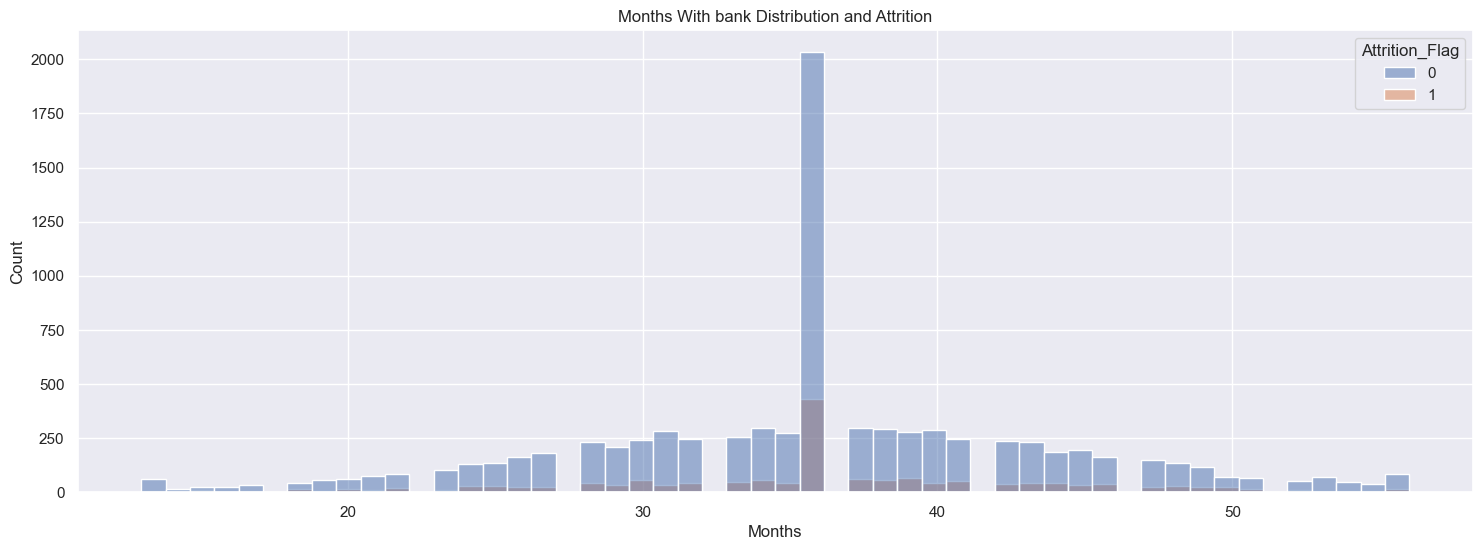

In [15]:
# Set the style (optional)
sns.set(style="darkgrid")

# Create a larger figure
plt.figure(figsize=(18, 6))

# Create the histogram
ax = sns.histplot(x='Months_on_book', data=copy_df, hue='Attrition_Flag', palette='deep')

# Set title and labels
plt.title('Months With bank Distribution and Attrition')
plt.xlabel('Months')
plt.ylabel('Count')

# Display the plot
plt.show()

Based on the graph above we can gather that:

- most users has been with us for over 30 months (more than 2 -3 years).
- Attrition is higer around the months of 30 to 39.

Bussines Insight:
- the same as the age we can give long term users award based on how long they gav been with us.
- Financialy consulting for long term users.

### 2.10 Gender and Attrition

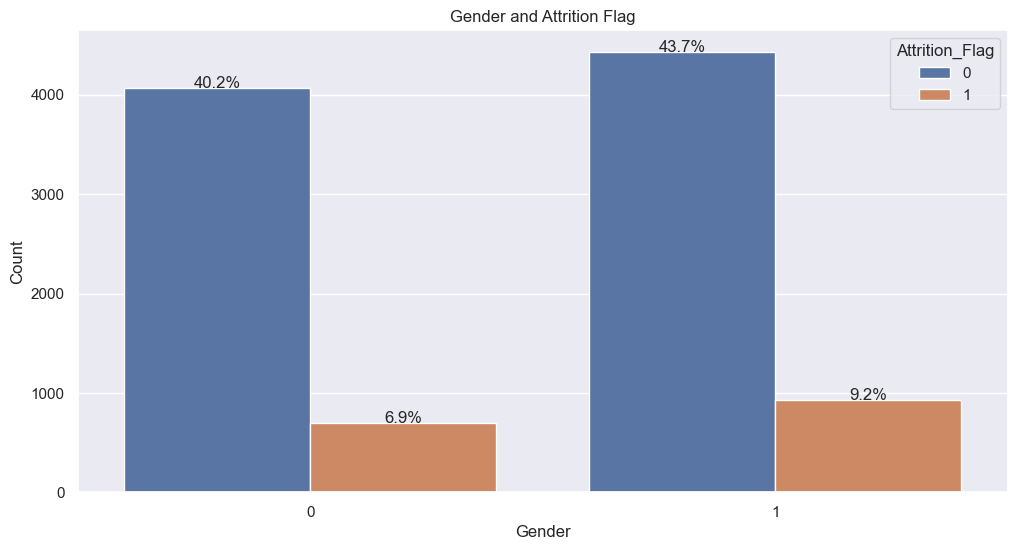

In [16]:
# Set the style
sns.set(style="darkgrid")

# Create a larger figure
plt.figure(figsize=(12, 6))

# Create the count plot with hue
ax = sns.countplot(x='Gender', data=copy_df, hue='Attrition_Flag', palette='deep')

# Calculate the percentage of each hue category
total = len(copy_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            '{:.1%}'.format(height / total),
            ha="center")

# Set title and labels
plt.title('Gender and Attrition Flag')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()

Male = 0 and Female = 1

Based on the graph above we can say that:

- There are 3.8 more females than there are male.
- both gender are quite evenly distributed with females having a higher attrition comapred to males by 1.2%

### 2.11 Education Level and Income Catagory

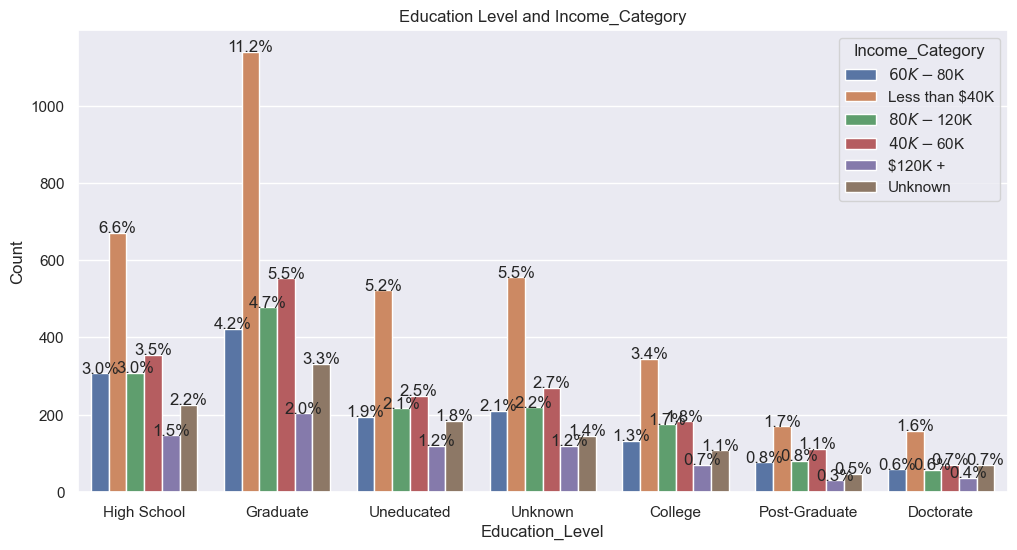

In [17]:
# Set the style
sns.set(style="darkgrid")

# Create a larger figure
plt.figure(figsize=(12, 6))

# Create the count plot with hue
ax = sns.countplot(x='Education_Level', data=copy_df, hue='Income_Category', palette='deep')

# Calculate the percentage of each hue category
total = len(copy_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            '{:.1%}'.format(height / total),
            ha="center")

# Set title and labels
plt.title('Education Level and Income_Category')
plt.xlabel('Education_Level')
plt.ylabel('Count')

# Display the plot
plt.show()

Based on the graph above we can say that:
- Majority of users are around high school, graduate, and uneducated with the most being graduate.
- majority of our users makes less then 40K.
- Unknown catagory will be randomly imputated during missing value handling.

Bussiness Insight:
- We cam give give financial counceling to high school and uneducated users so they can be more financially stable and lower churn rate.

### 2.12 Income Catagory and Attrition

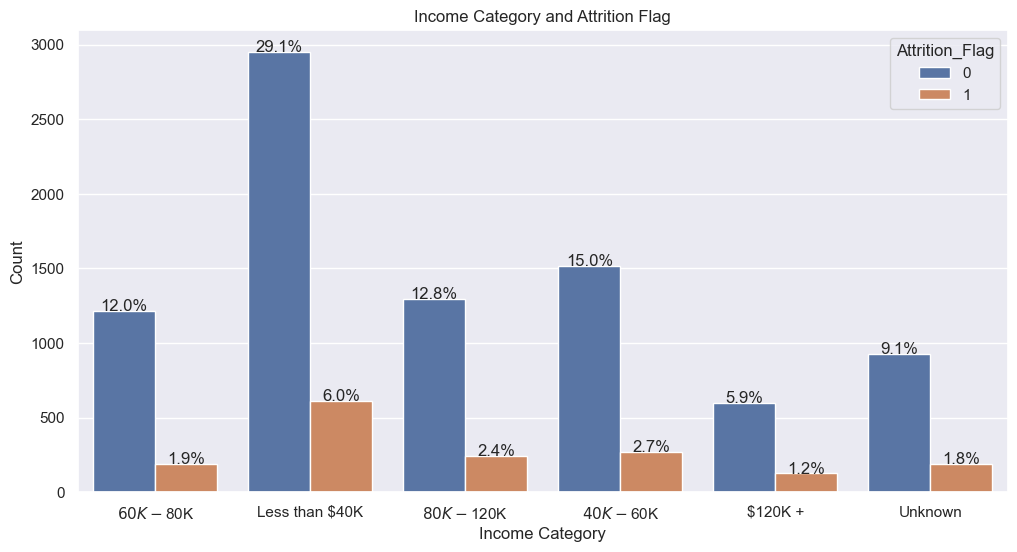

In [18]:
# Set the style
sns.set(style="darkgrid")

# Create a larger figure
plt.figure(figsize=(12, 6))

# Create the count plot with hue
ax = sns.countplot(x='Income_Category', data=copy_df, hue='Attrition_Flag', palette='deep')

# Calculate the percentage of each hue category
total = len(copy_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            '{:.1%}'.format(height / total),
            ha="center")

# Set title and labels
plt.title('Income Category and Attrition Flag')
plt.xlabel('Income Category')
plt.ylabel('Count')

# Display the plot
plt.show()

Based on the graph above we can say that:
- majority of our users makes less then 40K.
- Unknown catagory will be randomly imputated during missing value handling.
- arounf 2 to 6 % of each demograpich attributed/churn

Bussiness Insight:
- We cam give give financial counceling to those that make less than 40K.
- we can give some leniency for user that make less than 60K to pay of their credit card.

## 2.13 Cardinality Test

In [19]:
# Column title of catagorical types that will ne checked
column_title =  df.select_dtypes(exclude=['float64', 'int64']).columns

# Loop cardinality test for each item in the column_title
for item in column_title:
  print(f'Number of values in the variable {item} :{format(len(copy_df[item].unique()))}')

Number of values in the variable Education_Level :7
Number of values in the variable Marital_Status :4
Number of values in the variable Income_Category :6
Number of values in the variable Card_Category :4


Based on the cardinality test the result shows that the cardinality is low cardinality (from my perspective low cardinality is below 20). Hence there is no need to do any feature creation later on.

## 3. Split Train Test

In [20]:
# Split Between label and feature
X = df.drop(columns=['Attrition_Flag','CLIENTNUM'], axis = 1)            # Feature
y = df['Attrition_Flag']                                                 # Label

# Split into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=31   # Whatever number you want that is an interger
)


Train Test data has been split sucesfully

## 4. Feature Engineering

### 4.1 Missing Value Handilng (Random Imputation)

In [21]:
# Define a function for random imputation and flagging
def random_imputation(df,column):
    unknown_mask = column == 'Unknown'
    unique_values = column[~unknown_mask].unique()
    
    # Check if there are unknown values
    if unknown_mask.sum() > 0:
        random_values = np.random.choice(unique_values, size=unknown_mask.sum())
        column[unknown_mask] = random_values
    
    return column

# Columns with missing values
columns_to_impute = ['Education_Level', 'Marital_Status', 'Income_Category']


# Impute missing values in selected columns and update the flag column
for column in columns_to_impute:
    unknown_mask = df[column] == 'Unknown'
    X_train[column] = random_imputation(X_train, X_train[column])
    X_test[column] = random_imputation(X_test, X_test[column])


# Show X_train value after missing value handling
X_train


C:\Users\Irsyad\AppData\Local\Temp\ipykernel_36568\3477186560.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[unknown_mask] = random_values
C:\Users\Irsyad\AppData\Local\Temp\ipykernel_36568\3477186560.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[unknown_mask] = random_values
C:\Users\Irsyad\AppData\Local\Temp\ipykernel_36568\3477186560.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[unknown_mask] = 

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
4020,56,1,1,Graduate,Married,Less than $40K,Blue,51,3,3,4,1438.3,0,1438.3,0.798,3877,70,0.556,0.000
8224,59,0,2,Graduate,Single,$120K +,Blue,48,1,3,3,17999.0,1861,16138.0,0.791,4740,78,0.950,0.103
3801,44,1,2,Uneducated,Married,Less than $40K,Blue,36,1,3,3,13735.0,1733,12002.0,0.614,1783,43,0.654,0.126
5131,50,0,1,College,Married,$80K - $120K,Blue,33,5,3,2,17158.0,1211,15947.0,0.778,4153,91,0.685,0.071
1009,60,0,0,Uneducated,Married,$60K - $80K,Blue,47,3,3,3,9452.0,2517,6935.0,0.730,1825,50,0.613,0.266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,35,1,0,Graduate,Married,Less than $40K,Blue,36,4,3,4,2089.0,0,2089.0,0.871,2707,51,0.500,0.000
28,44,1,3,Uneducated,Single,$120K +,Blue,34,5,2,2,10100.0,0,10100.0,0.525,1052,18,1.571,0.000
826,34,0,2,High School,Married,$60K - $80K,Blue,28,3,3,3,2853.0,2420,433.0,0.858,1750,47,0.808,0.848
3735,40,0,5,Graduate,Single,$120K +,Blue,27,5,2,3,31954.0,2297,29657.0,0.516,4371,82,0.640,0.072


In [22]:
# Show X_test value after missing value handling
X_test

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
4064,46,0,3,College,Married,$80K - $120K,Blue,26,6,2,3,1438.3,864,574.3,0.766,2299,40,0.481,0.601
737,39,0,1,College,Single,$40K - $60K,Blue,24,4,3,3,3770.0,1197,2573.0,0.621,1602,49,0.441,0.318
7695,41,1,5,High School,Married,$40K - $60K,Blue,30,5,2,3,1588.0,0,1588.0,0.634,2561,61,0.649,0.000
7833,55,1,4,Uneducated,Single,Less than $40K,Blue,46,3,2,2,4978.0,923,4055.0,0.883,5025,62,0.879,0.185
9674,57,0,3,Post-Graduate,Single,$80K - $120K,Blue,50,3,1,1,34516.0,2293,32223.0,0.799,14287,114,0.754,0.066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5789,49,1,4,Graduate,Married,Less than $40K,Blue,34,3,1,3,2560.0,1430,1130.0,0.766,4783,86,0.792,0.559
9285,32,0,1,High School,Single,$40K - $60K,Blue,36,6,3,2,4819.0,2134,2685.0,0.834,9330,64,0.882,0.443
8564,57,0,2,Post-Graduate,Divorced,$120K +,Blue,38,1,2,4,24379.0,1116,23263.0,0.620,2836,41,0.281,0.046
5791,43,1,5,Uneducated,Single,Less than $40K,Blue,36,4,3,2,2057.0,1279,778.0,0.562,4321,76,0.689,0.622


As stated above the total missing value is 30% of our data so we will conduct random imputation on each 'Unknown' value, and the result is that the missing value imputation is sucsesfully compleated

### 4.2 Outlier Handling

In [23]:
# Show nominal Column to handle outliers
nominal =  X_train.select_dtypes(include=['float64', 'int64']).columns
nominal

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

Make a nominal only list

#### 4.2.1 Skewness Check

In [24]:
#  create a function to check skewness
def calculate_and_filter_skewness(dataframe, threshold=0.5):    # Threshold is set to 0.5
    skewness_results = dataframe.skew()

    skewness_df = pd.DataFrame({'features': skewness_results.index, 'Skewness': skewness_results.values})
    
    # Filter features where skewness is greater than threshold or less than -threshold
    skewed_features = skewness_df[(skewness_df['Skewness'] > threshold) | (skewness_df['Skewness'] < -threshold)]
    
    # Filter features where skewness is between -threshold and threshold
    not_skewed_features = skewness_df[(skewness_df['Skewness'] >= -threshold) & (skewness_df['Skewness'] <= threshold)]
    
    # Return skewed_features, not_skewed_features as values
    return skewed_features, not_skewed_features


# store skewness value after running function
skewed_features, not_skewed_features = calculate_and_filter_skewness(X_train[nominal])

#  show the DataFrames of skewed columns
skewed_features



,features,Skewness
5,Months_Inactive_12_mon,0.671442
7,Credit_Limit,1.664389
9,Avg_Open_To_Buy,1.659013
10,Total_Amt_Chng_Q4_Q1,1.776009
11,Total_Trans_Amt,2.027059
13,Total_Ct_Chng_Q4_Q1,1.815464
14,Avg_Utilization_Ratio,0.702681


There are 7 columns that are skewed, which we will cap using the iqr method.

The reason why we use capping method is because we do not want to trim out data from the dataset, because those data might be important to the model perdition, without prior knowledge we cannot just the the outliers.


In [25]:
skewed_list = skewed_features['features'].tolist()

# using winsorizeer to cap the columns
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=skewed_list)   

# Fit and transform the Winsorizer to X_train_clean
X_train_capped = winsorizer.fit_transform(X_train)
X_test_capped = winsorizer.fit_transform(X_test)



Skewed Dataset has been capped.

In [26]:
not_skewed_features

,features,Skewness
0,Customer_Age,-0.029168
1,Gender,-0.112034
2,Dependent_count,-0.025960
3,Months_on_book,-0.099406
4,Total_Relationship_Count,-0.156286
6,Contacts_Count_12_mon,-0.003154
8,Total_Revolving_Bal,-0.149011
12,Total_Trans_Ct,0.151984


There are a total of 8 columns that are not skewed, for these columns we will use the gaussian capping method.

In [27]:
not_skewed_list = not_skewed_features['features'].tolist()

# using winsorizeer to cap the columns
winsorizer = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=not_skewed_list)   

# Fit and transform the Winsorizer to X_train_clean
X_train_capped = winsorizer.fit_transform(X_train_capped)
X_test_capped = winsorizer.fit_transform(X_test_capped)



Non_skewed data has been capped

#### 4.2.2 Outlier Handling Before and After

In [28]:
def plot_histogram_boxplot(df, df_capped, variable):
    # Before Capping
    
    # Create figure and axes
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Plot histogram for df
    axes[0, 0].hist(df[variable], bins=30, color='skyblue', edgecolor='black')
    axes[0, 0].set_title(f"{variable} Histogram (Before Capping)")

    # Plot boxplot for df
    sns.boxplot(x=df[variable], ax=axes[0, 1])
    axes[0, 1].set_title(f"{variable} Box Plot (Before Capping)")

    # After Capping 

    # Plot histogram for df_capped
    axes[1, 0].hist(df_capped[variable], bins=30, color='lightcoral', edgecolor='black')
    axes[1, 0].set_title(f"{variable} Histogram (After Capping)")

    # Plot boxplot for df_capped
    sns.boxplot(x=df_capped[variable], ax=axes[1, 1])
    axes[1, 1].set_title(f"{variable} Box Plot (After Capping)")

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()


A Function to create graph before and after is complete

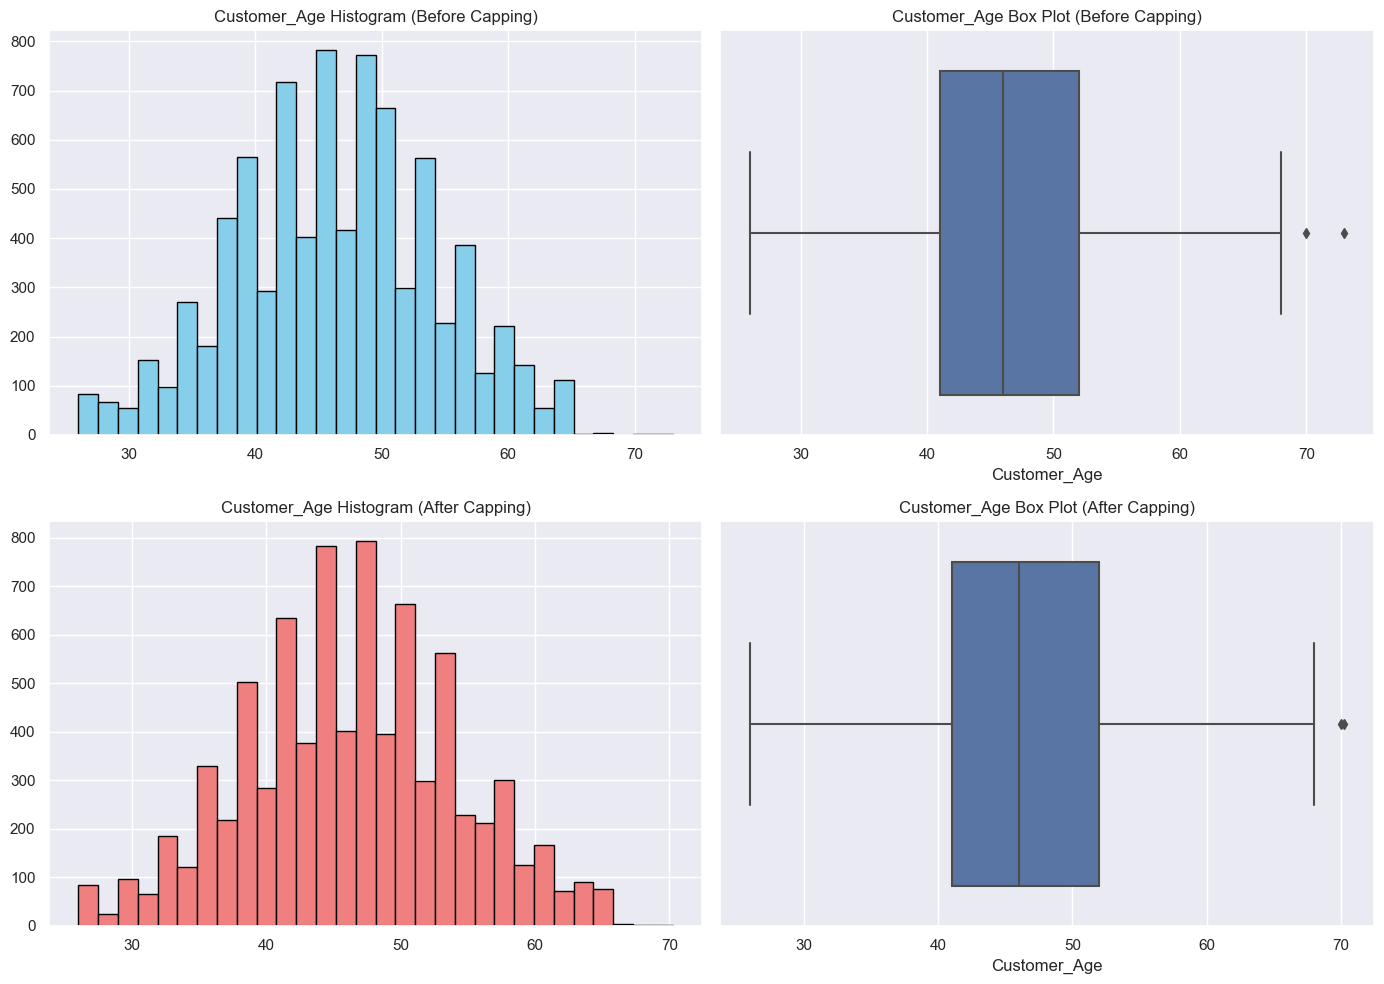

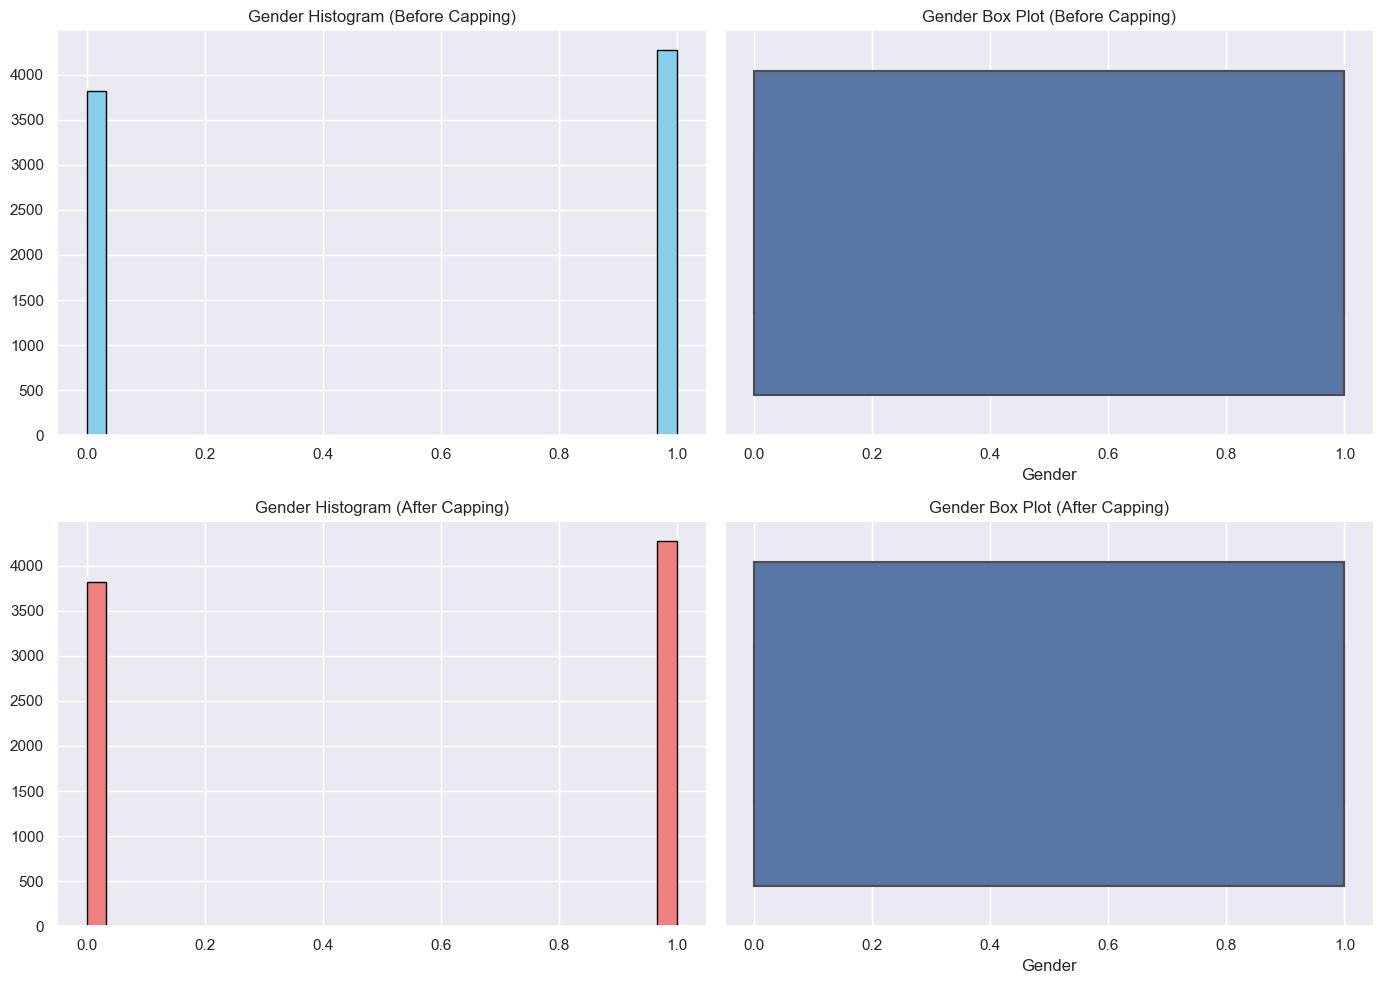

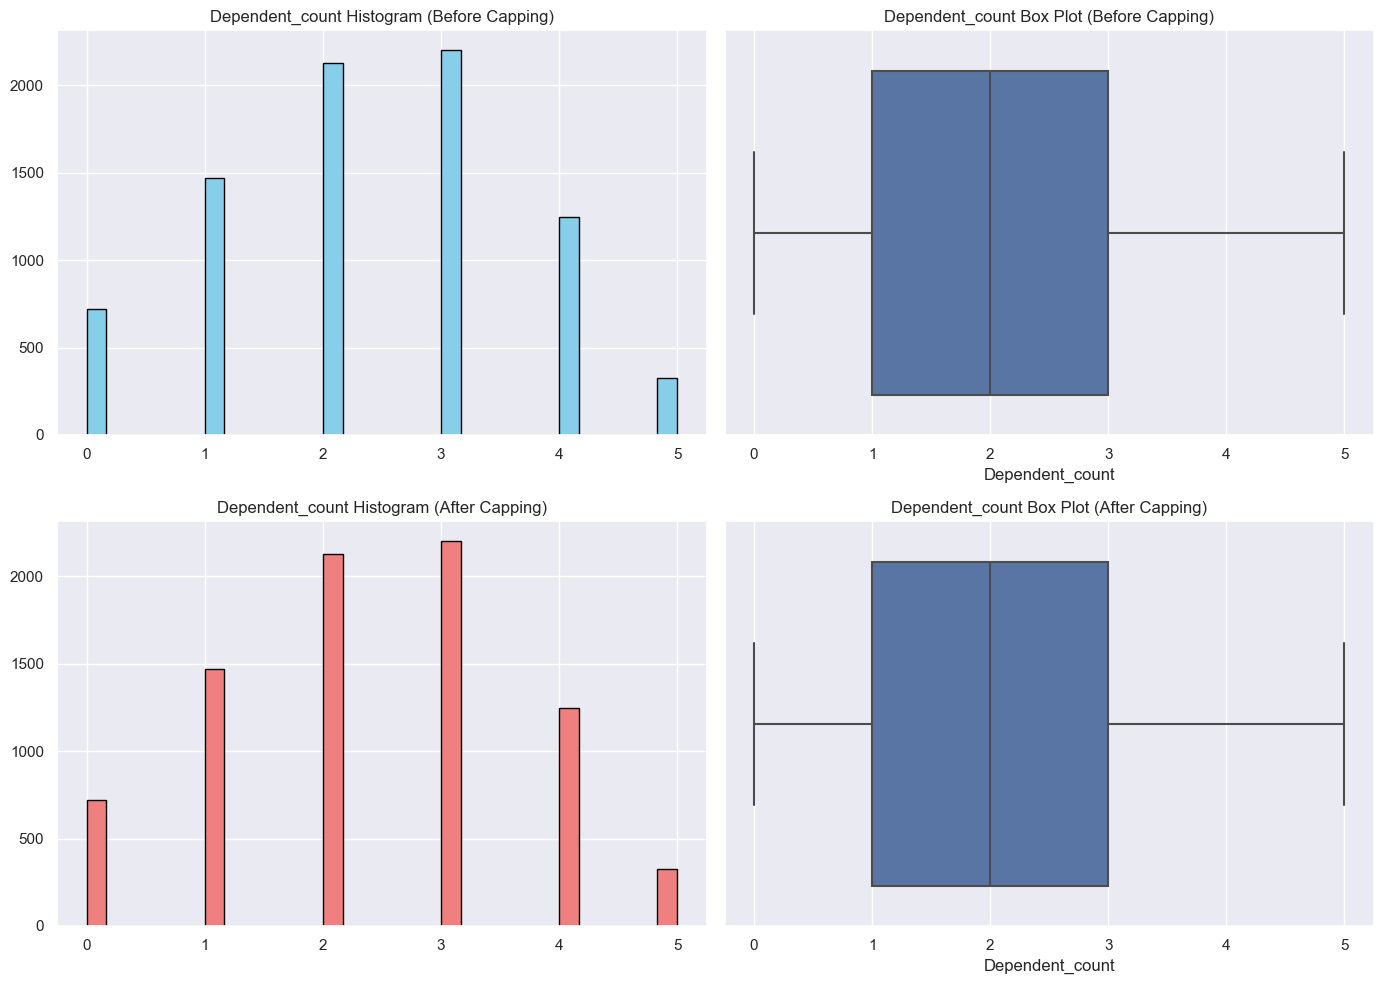

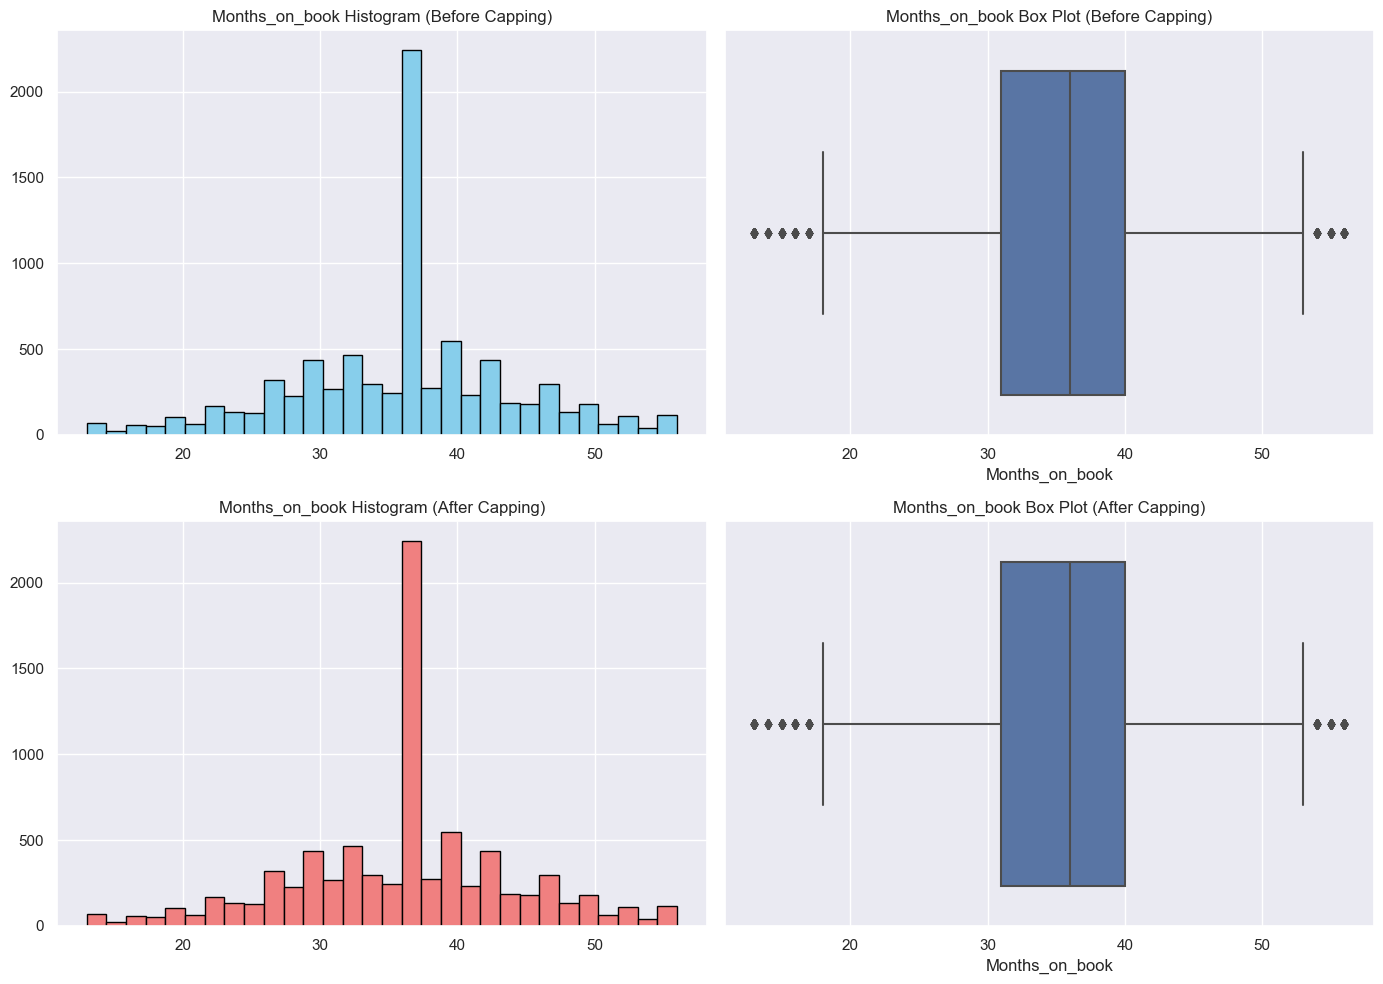

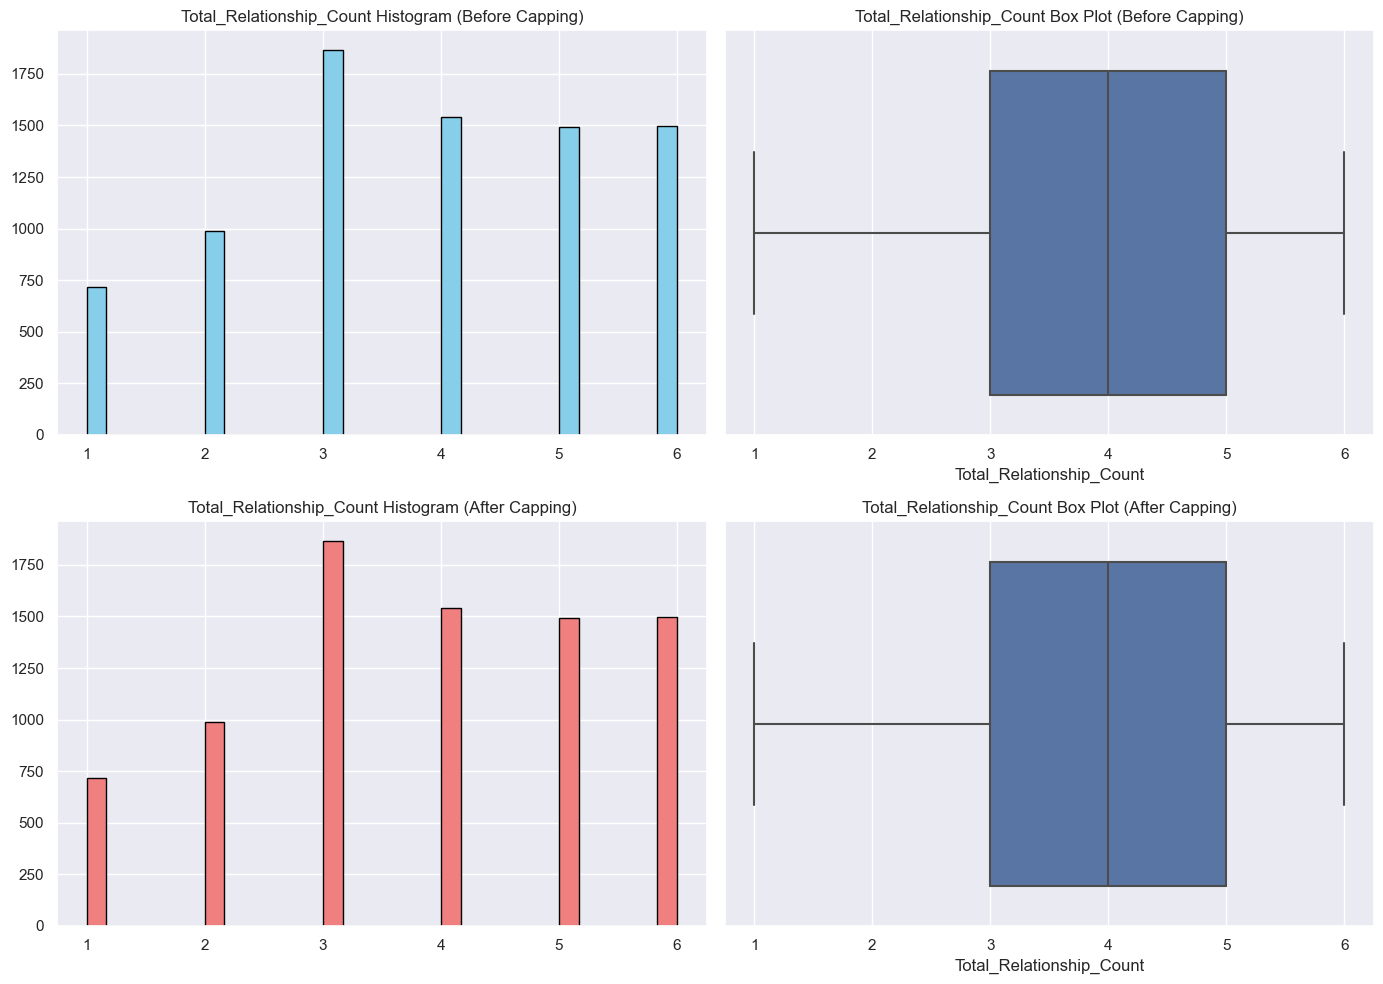

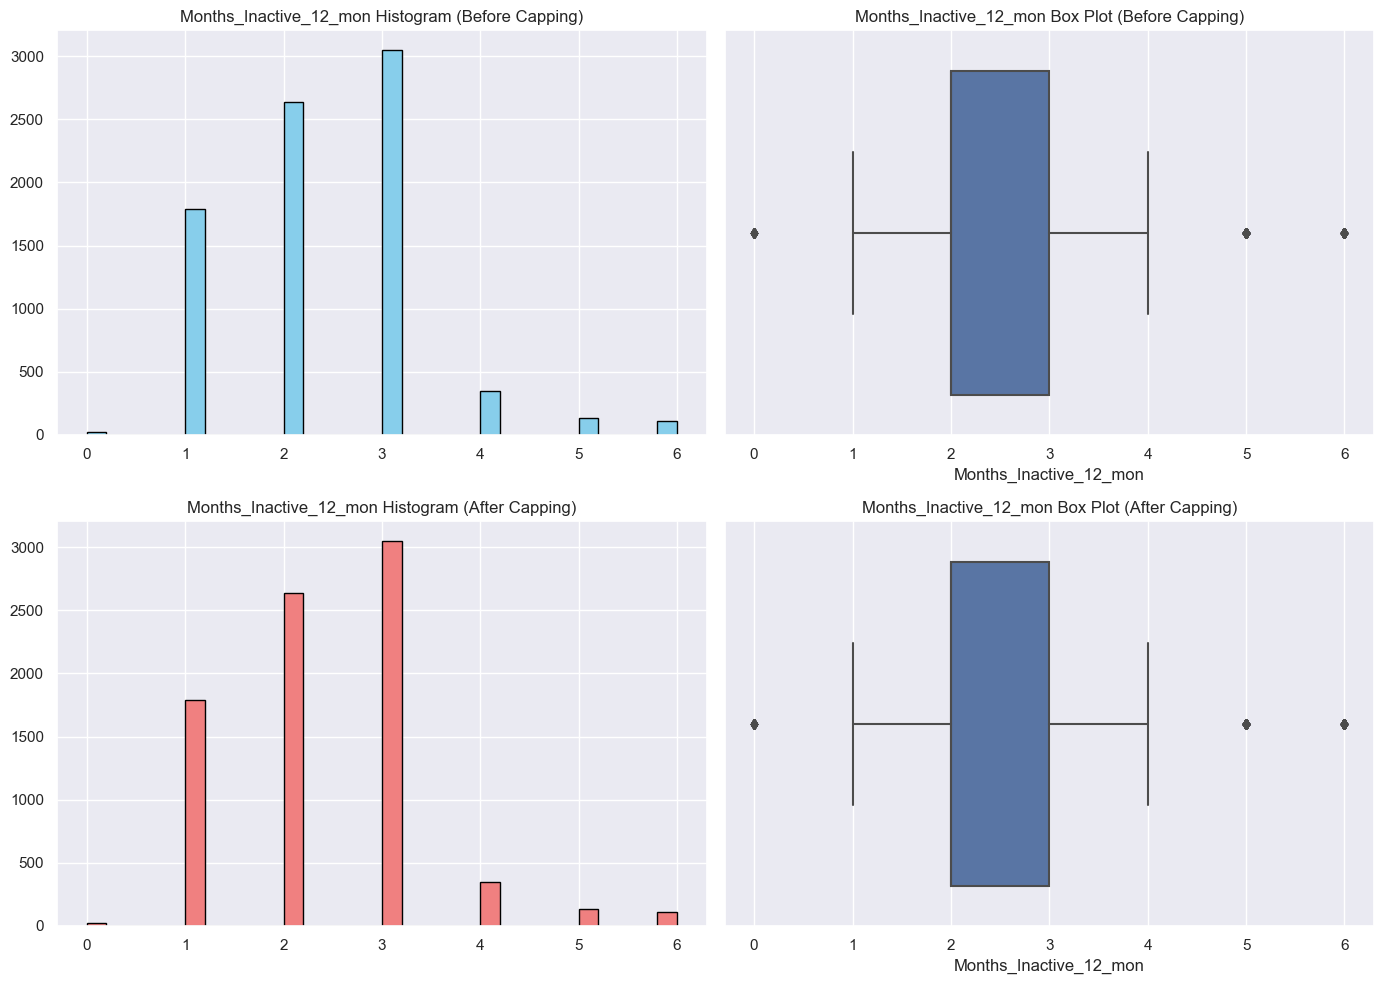

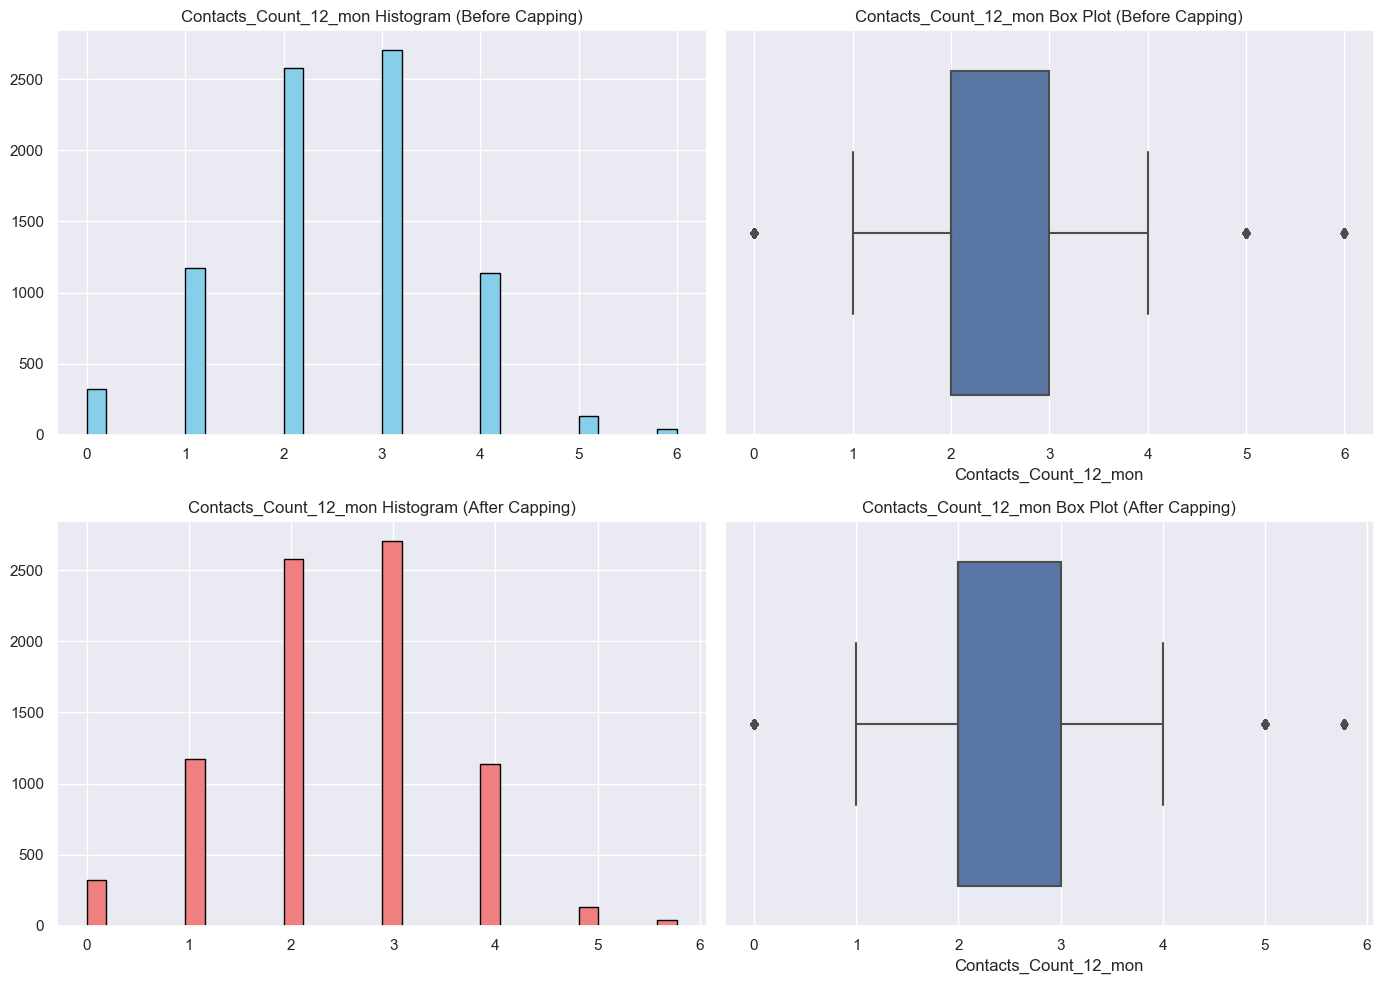

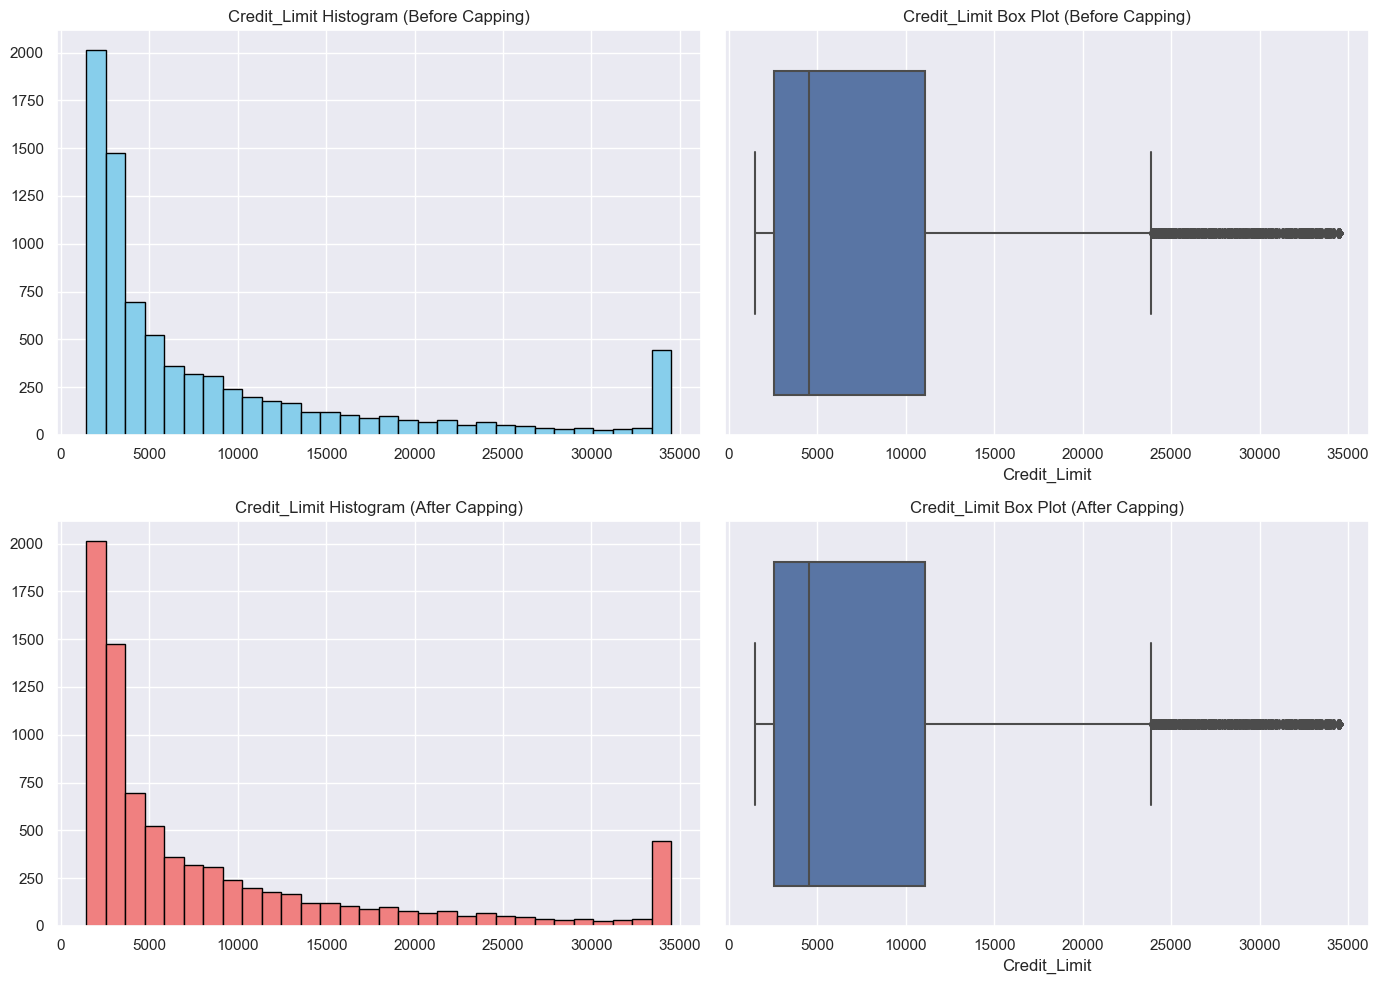

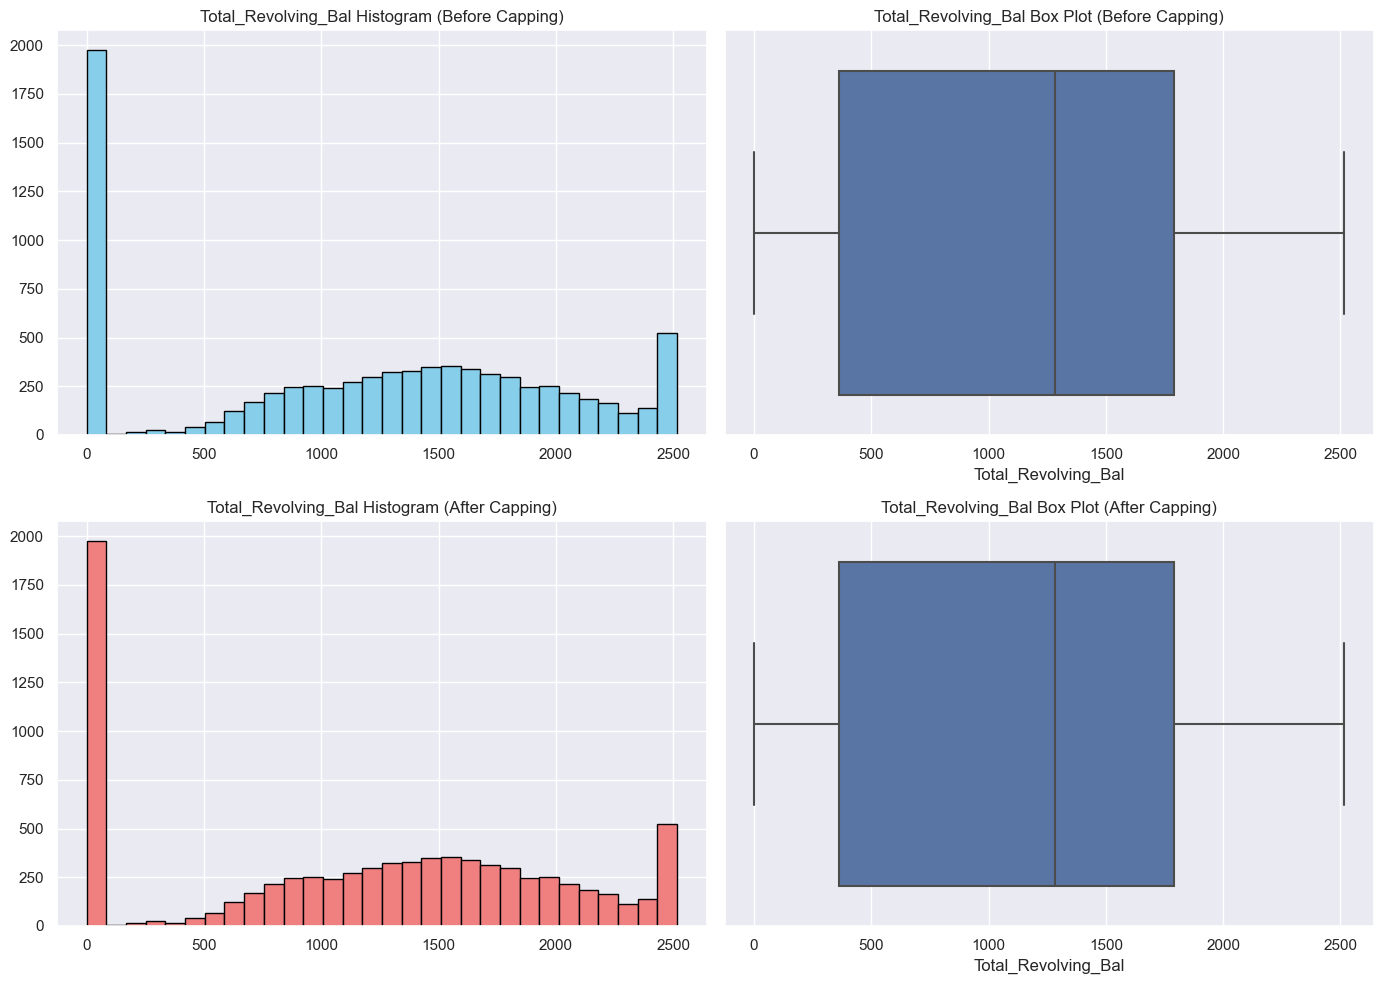

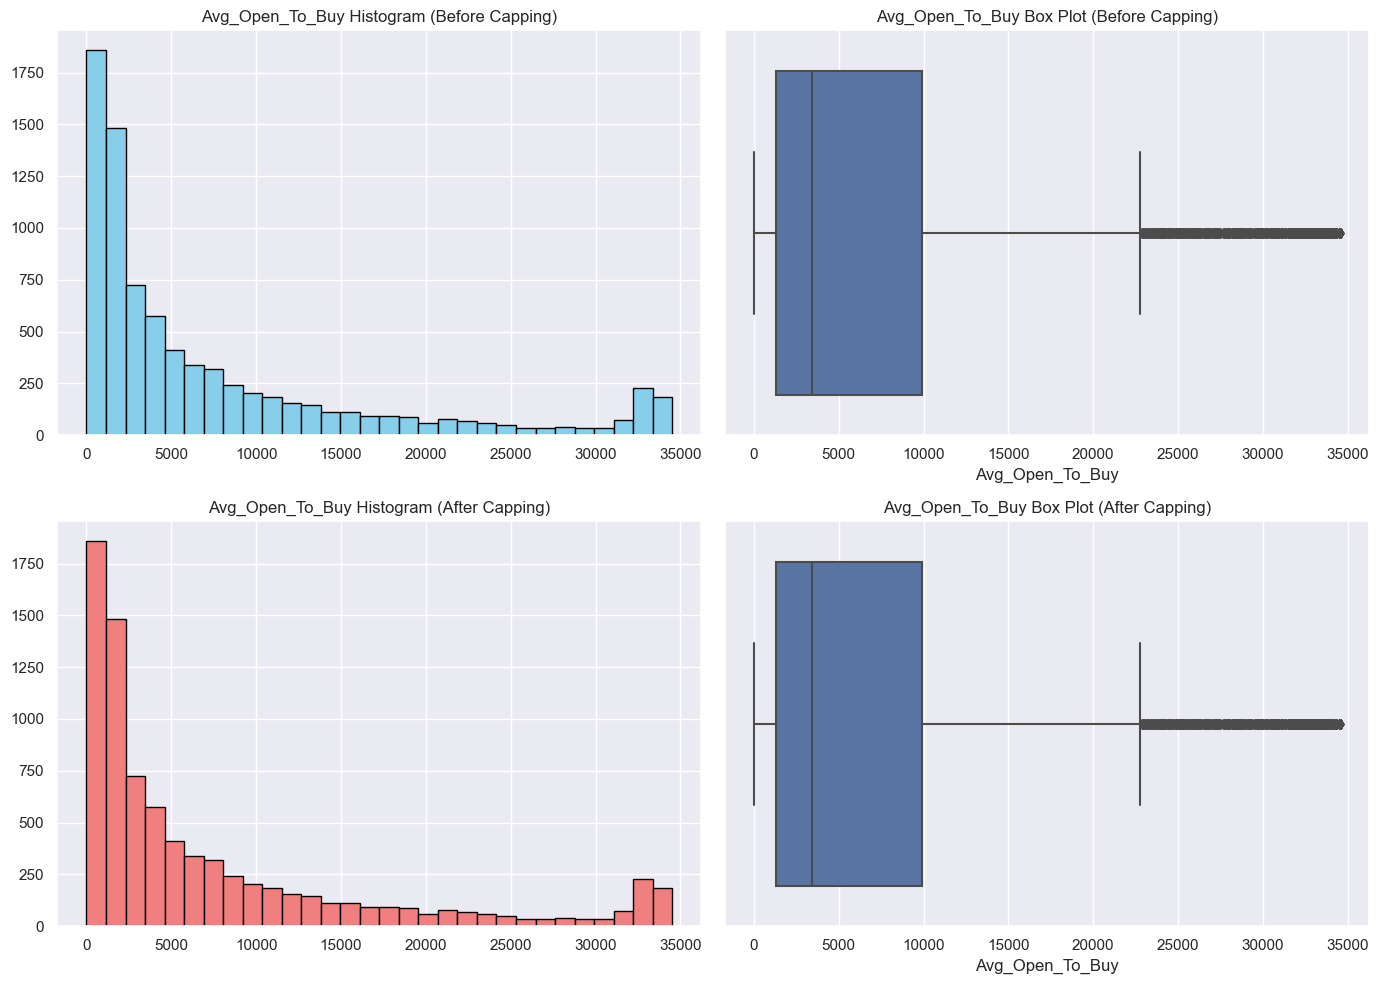

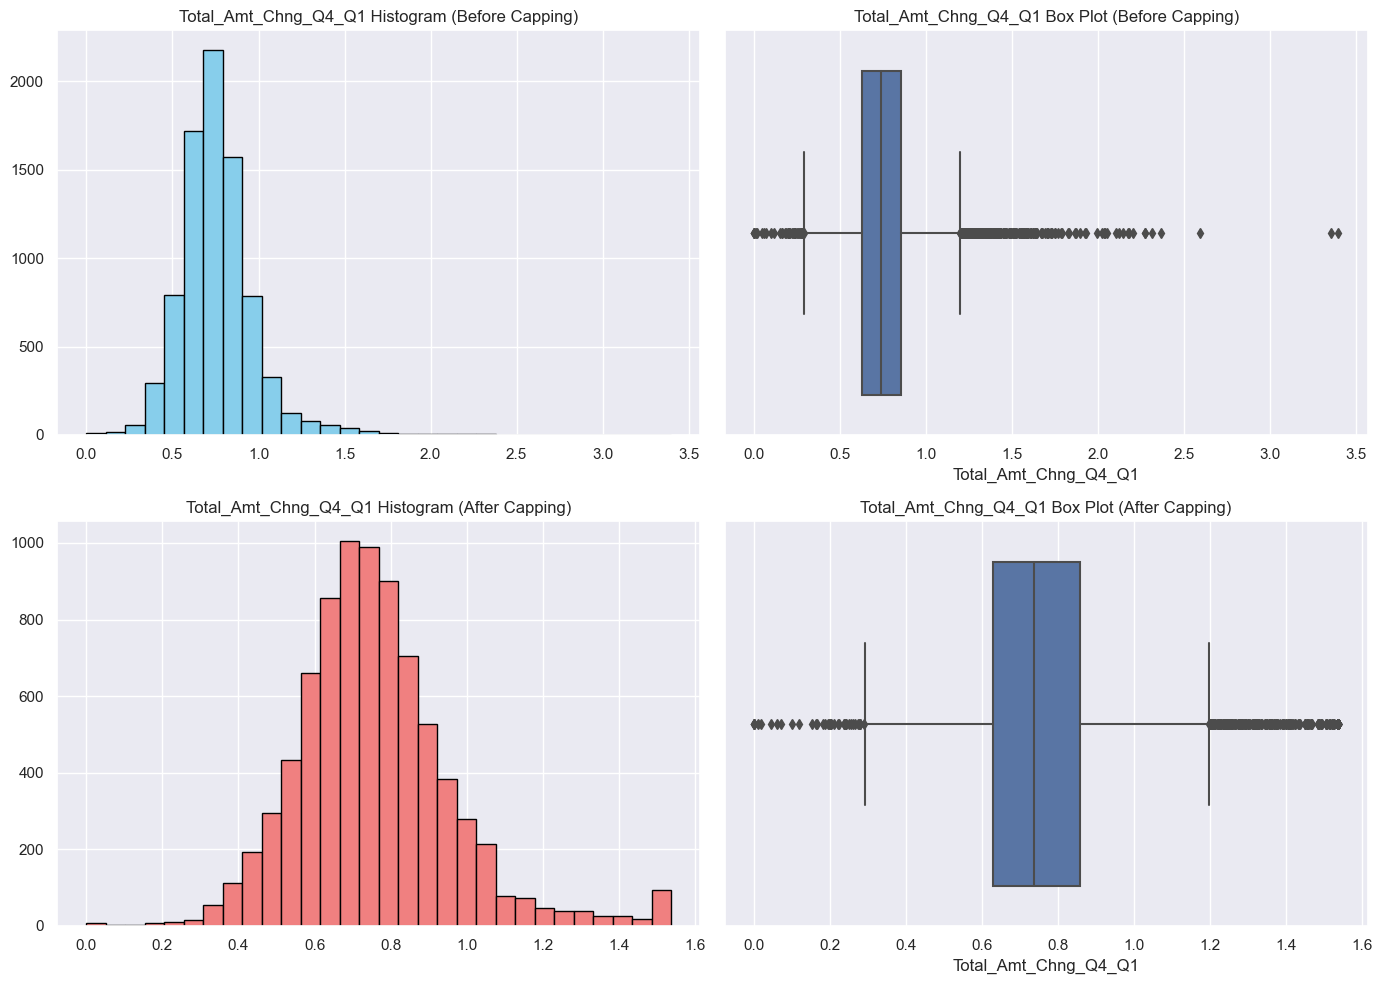

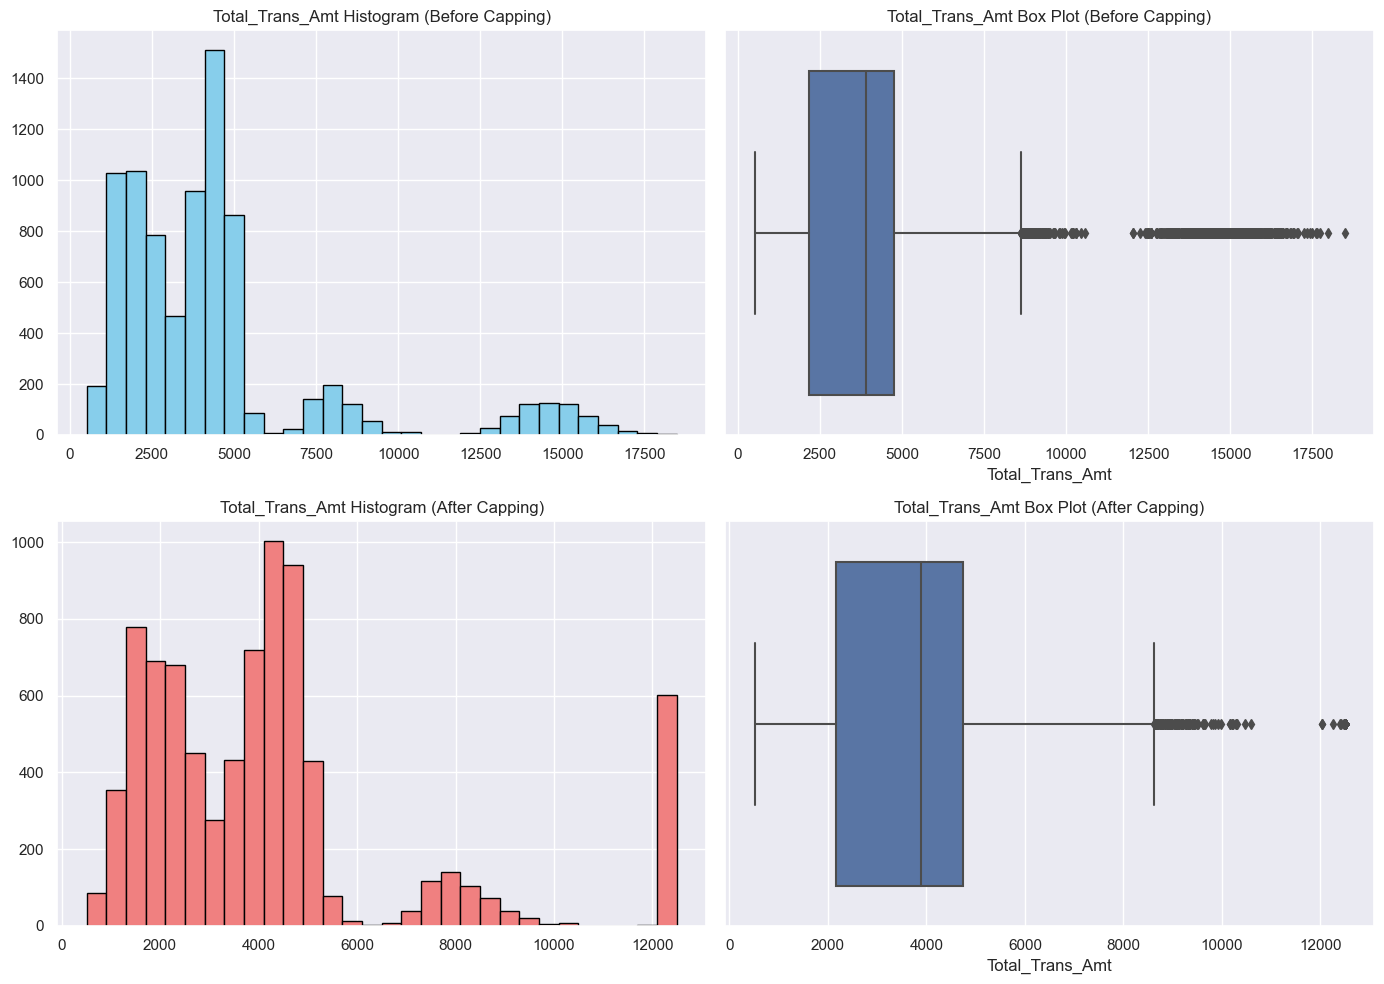

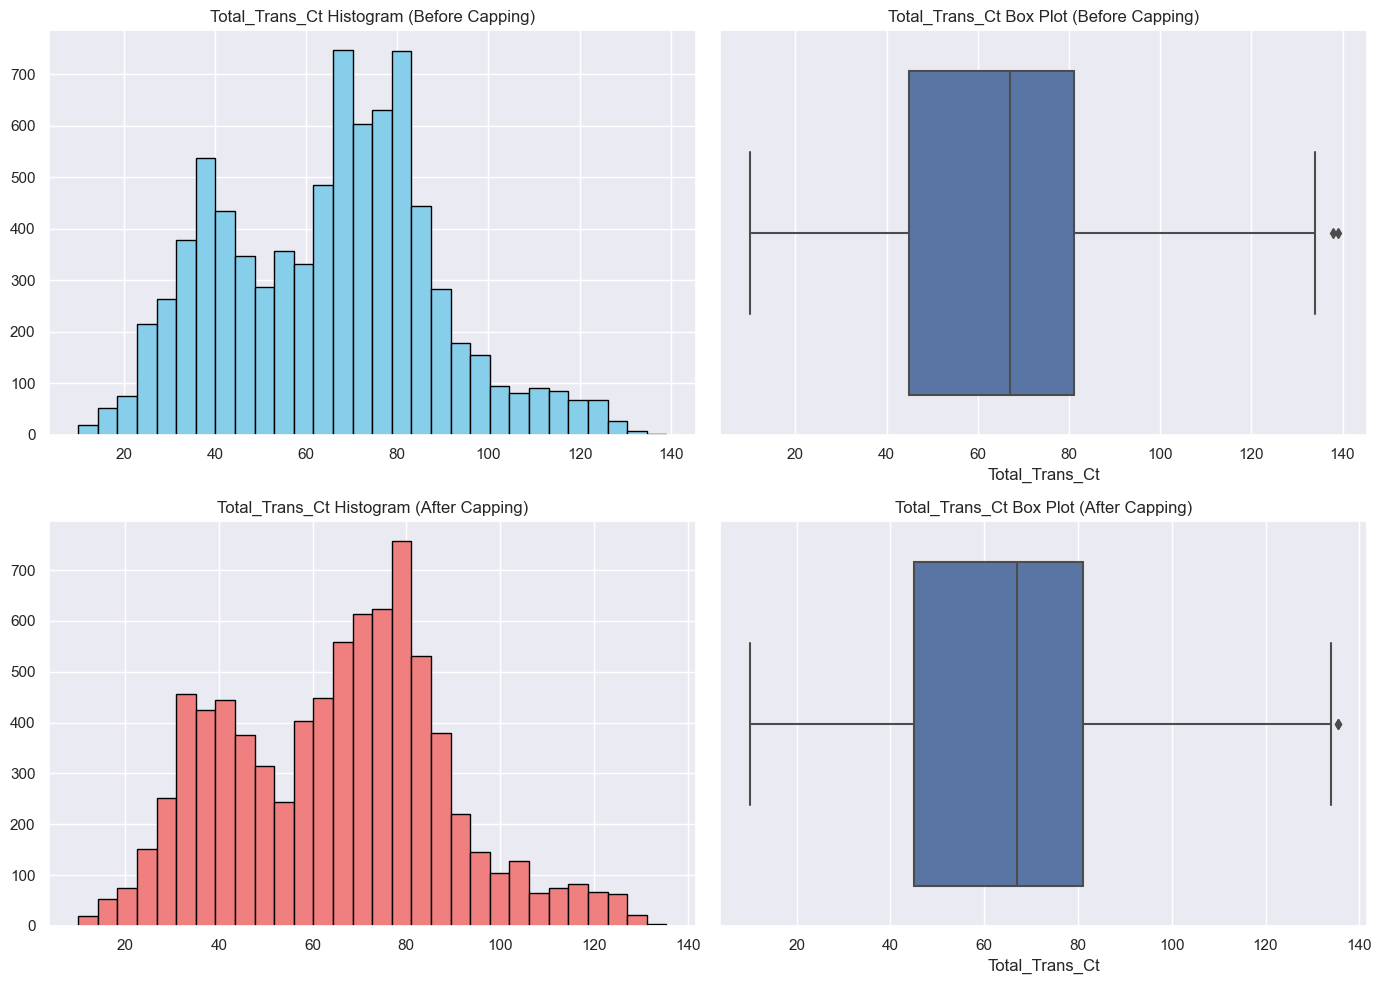

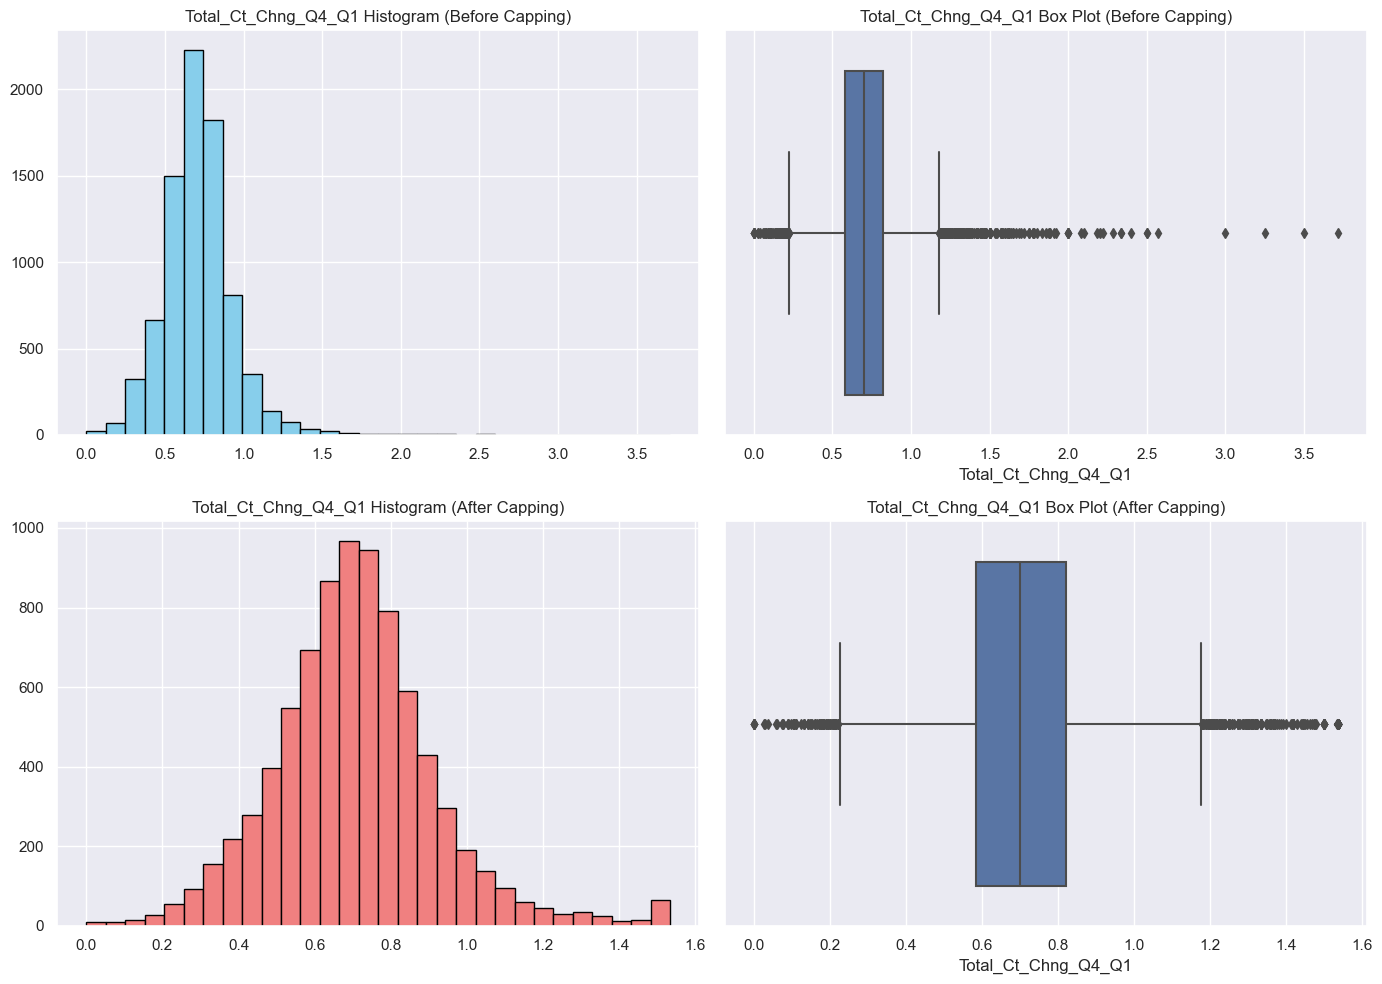

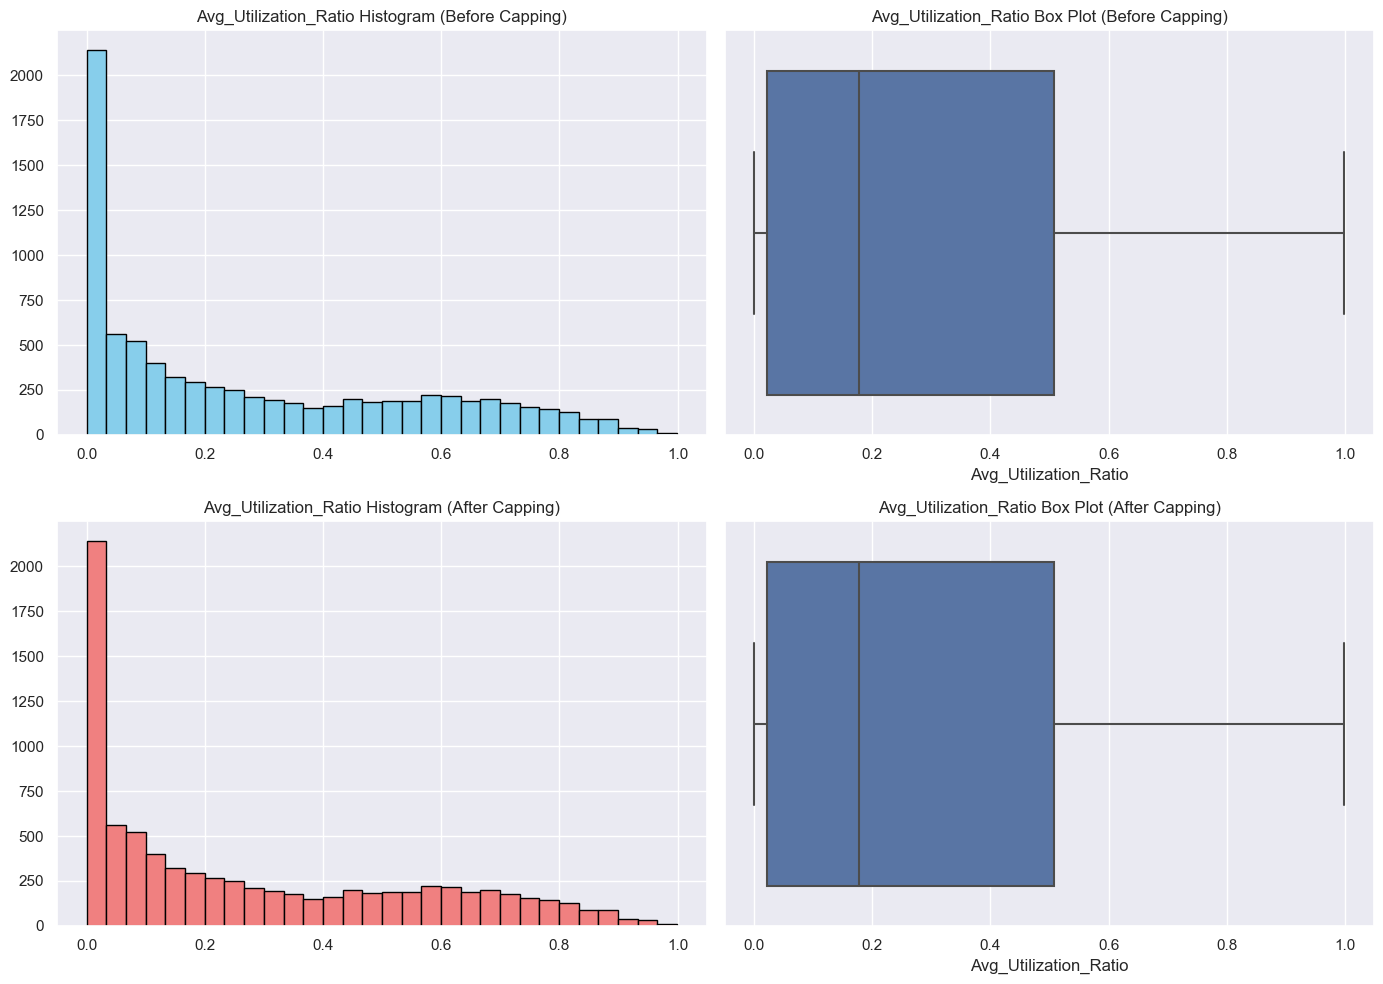

In [29]:
# Loop each graph that is in the columns variable for X_train before and after capping
for name in nominal:
       plot_histogram_boxplot(X_train, X_train_capped, name)

We can see that the outlier capping is sucsesfully, the difference between before and after can be seen well on the total ct_chgn_q1_q4.

### 4.2 Feature Selection

In this Section we want to find the correlation with in multiple ways,

firstly we want to find out the top 10 columns in the matter of importance using XGboost

secondly we want to find the correlation between feature and label using kendall (catagorical) and spearman (nominal), and we will analyze and select based on data and domain knowledge.

### 4.2.1 Feature of Importance

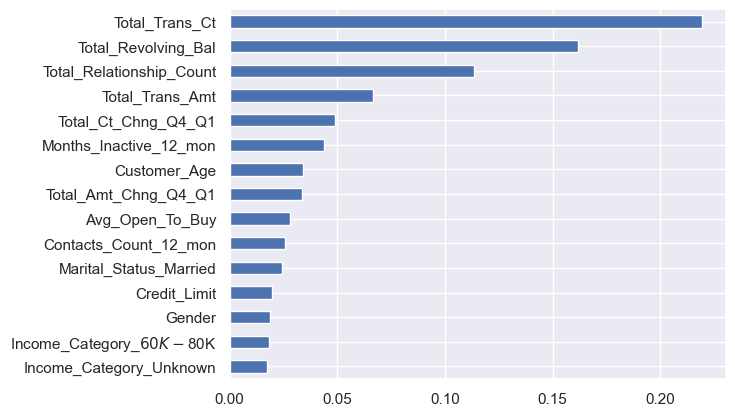

In [30]:
# Dropping'Attrition_Flag' is the target variable in X
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

# Encode target variable to numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)

# Initialize XGBoost model
model = XGBClassifier()

# Fit the model on the training data
model.fit(X_encoded, y_encoded)

# Calculate feature importances
feat_importances = pd.Series(model.feature_importances_, index=X_encoded.columns)

# Plot the top 10 most important features
feat_importances.nlargest(15).plot(kind='barh').invert_yaxis()
plt.show()

Based on the feature of importance we can see on the top 15 that values above 0.05 are only 3 columns which are:

- Total_Trans_Ct
- Total_Revolving_Count
- Total_Relationship_Count

To further include more columns and exclude some that may not be important we will do 2 correlations
- catagorical using kendall
- nominal using spearman

**Note: This is only for selection the model will be done again with the correct encoder and scale**

### 4.2.2 Split Catagorical and Nominal

In [31]:
# Show catagorical data type columns
catagorical =  X_train_capped.select_dtypes(exclude=['float64', 'int64']).columns
catagorical

Index(['Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

Show only catagorical data type .

In [32]:
# Show nominal data type columns for X_train_capped
nominal =  X_train_capped.select_dtypes(include=['float64', 'int64']).columns
nominal

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

Show only nominal data type.

### 4.2.3 Catagorical Correlation

In [33]:
# Change catagorical into a list
catagorical_list = catagorical.to_list()

# empty list for cor, p value, and kendall value
catagorical_cor = []
p_value = []
kendall_value = []

# loop through all data in the catagorical_list
for item in catagorical_list:
  corr_tau, pval_k = stats.kendalltau(X_train_capped[item], y_train)

  # append only data that are correlated
  if pval_k < 0.05:
    catagorical_cor.append(item)
    p_value.append(pval_k)
    kendall_value.append(corr_tau)

# Make a dataFrame
catagorical_data = {'feature': catagorical_cor,
              'p_value': p_value,
              'pearson_value': kendall_value}

# Show dataframe of correlated columns
catagorical_df = pd.DataFrame(catagorical_data)
catagorical_df

,feature,p_value,pearson_value


We use kendall in this instance because of a few reasons.

- Kendall is non paramatric so it does not assume if the data is normaly distributed or not.
- Kendall value is good for ordinal value, although it not as good in this case, we can still use it to find the required corelations

we can see that there are no data in the catagorical that are correlated to the label/target.

In [34]:
# Change catagorical into a list
nominal_list = nominal.to_list()

# Empty List of nominal Correlation, p value, and spearman value
nominal_cor = []
p_value = []
spearman_value = []

# Create a loop of correlation test using spearman
for item in nominal_list:
  corr_rho, pval_s = stats.spearmanr(X_train_capped[item], y_train)

  if pval_s < 0.05:  # Check if p-value is less than 0.05
    nominal_cor.append(item)
    p_value.append(pval_s)
    spearman_value.append(corr_rho)

# Create a dataframe of nominal data  
nominal_data = {'feature': nominal_cor,
              'p_value': p_value,
              'spearman_value': spearman_value}

# convert dictionary into dataframe and show the results
nominal_df = pd.DataFrame(nominal_data)
nominal_df

,feature,p_value,spearman_value
0,Gender,6.538082e-04,0.037859
1,Total_Relationship_Count,1.201651e-37,-0.141783
2,Months_Inactive_12_mon,7.958036e-61,0.181313
3,Contacts_Count_12_mon,4.010124e-63,0.184750
4,Credit_Limit,1.488148e-06,-0.053443
5,Total_Revolving_Bal,5.177311e-100,-0.232653
6,Avg_Open_To_Buy,3.115835e-02,0.023944
7,Total_Amt_Chng_Q4_Q1,1.239710e-19,-0.100483
8,Total_Trans_Amt,1.437813e-95,-0.227464
9,Total_Trans_Ct,1.900190e-275,-0.379244


We use Spearman in this instance because of a few reasons.

- Spearman is non paramatric so it does not assume if the data is normaly distributed or not.
- Spearman value is good for ordinal value, althoug not all of the correlation are ordinal we can still use it to find the necessary correlation value and compare it to the level of importance graph

We can see that comapared to the feature of importance graph that, all of the data above are corelated well although Avg_Utilization_Ratio does not even count in the top 15 of the total of importance.

We can summarize that based on the correlation result and the feature of importance is that:

- we can drop Avg_Utilization_Ratio as it does not even reach the top 15 of the order of importance graph.

- we can use the ones that are correlated with the label that are included in the order of importance graph.

- in total we have 11 graph that we will be using which are:

  - 1 Gender
  - 2 Total_Relationship_Count
  - 3	Months_Inactive_12_mon
  - 4	Contacts_Count_12_mon
  - 5	Credit_Limit
  - 6	Total_Revolving_Bal
  - 7	Avg_Open_To_Buy
  - 8	Total_Amt_Chng_Q4_Q1
  - 9	Total_Trans_Amt
  - 10	Total_Trans_Ct
  - 11 Total_Ct_Chng_Q4_Q1	

a total of 11 columns that we will be using in this dataset and the rest will be excluded in the model training.

In [35]:
columns_to_keep = ['Gender', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
                    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']

# Select only the desired columns in X_train
X_train_capped = X_train_capped.loc[:, columns_to_keep]

# Select only the desired columns in X_test
X_test_capped = X_test_capped.loc[:, columns_to_keep]

New Dataframe has been made with the correlated features

In [36]:
# Show result after excluding other features
X_test_capped

,Gender,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
4064,0,6,2,3.0,1438.3,864,574.3,0.766,2299.00,40,0.481
737,0,4,3,3.0,3770.0,1197,2573.0,0.621,1602.00,49,0.441
7695,1,5,2,3.0,1588.0,0,1588.0,0.634,2561.00,61,0.649
7833,1,3,2,2.0,4978.0,923,4055.0,0.883,5025.00,62,0.879
9674,0,3,1,1.0,34516.0,2293,32223.0,0.799,12523.25,114,0.754
...,...,...,...,...,...,...,...,...,...,...,...
5789,1,3,1,3.0,2560.0,1430,1130.0,0.766,4783.00,86,0.792
9285,0,6,3,2.0,4819.0,2134,2685.0,0.834,9330.00,64,0.882
8564,0,1,2,4.0,24379.0,1116,23263.0,0.620,2836.00,41,0.281
5791,1,4,3,2.0,2057.0,1279,778.0,0.562,4321.00,76,0.689


Avg_Utilization_Ratio and Income_Category has been drop from the catagorical_df and nominal_df

## 5. Data Balancing

In [37]:
# Define SMOTE function
smote = SMOTE()

# Balance data using SMOTE
X_train_final, y_train_final = smote.fit_resample(X_train_capped, y_train)

SMOTE is used to conduct balancing of the minority data by oversampling the minority data to the same size as the majority data.

The balancing has been compleated sucsesfully.

## 6. Preprocesing (Encoding and Scaling)

### 6.1 Split Nominal and Catagorical to Scale and Encode

In [38]:
# changing dataframe of filtered nominal and catagorical into list
filter_nominal = X_train_final.columns.tolist()

Make a catagorical list and nominal list for preprocessing

In [39]:
# Making a scaler to scale and encode in pipepline
preprocessor = ColumnTransformer([
        ('num', StandardScaler(), filter_nominal)], remainder="passthrough")

Scaler as been made into preprocessor.

since all data is nominal or already encoded we do not need to do any encoder of any kind.

the reason why we use StandardScaler is because this data is sensitive towards MinMaxScaler because the range between min and max will effect the model quite a bit, and MinMaxScaler are quite good for data that has a negative value, while this data does not have any negative value.

The reason we use preprocessing here is because we would like to scale during the pipiline toghether with the model.

## 7. Model Definition (Pipeline)

### 7.1 KNN

In [40]:
# Make knn pipeline
knn_pipe = Pipeline([
  ('preprocessor', preprocessor),  
  ('modeling',KNeighborsClassifier())
])

# Show pipeline steps
print(knn_pipe.steps)

[('preprocessor', ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['Gender', 'Total_Relationship_Count',
                                  'Months_Inactive_12_mon',
                                  'Contacts_Count_12_mon', 'Credit_Limit',
                                  'Total_Revolving_Bal', 'Avg_Open_To_Buy',
                                  'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                                  'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'])])), ('modeling', KNeighborsClassifier())]


KNN Pipeline has been made with proprocessing and modeling using KNeighborsClassifier

### 7.2 SVM

In [41]:
# Make svm pipeline
svm_pipe = Pipeline([
  ('preprocessor', preprocessor), 
  ('modeling',SVC())
])

# Show pipeline steps
print(svm_pipe.steps)

[('preprocessor', ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['Gender', 'Total_Relationship_Count',
                                  'Months_Inactive_12_mon',
                                  'Contacts_Count_12_mon', 'Credit_Limit',
                                  'Total_Revolving_Bal', 'Avg_Open_To_Buy',
                                  'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                                  'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'])])), ('modeling', SVC())]


SVM Pipeline has been made with proprocessing and modeling using SVC

### 7.3 Decision Tree

In [42]:
# Make decision Tree pipeline
decision_tree_pipe = Pipeline([
  ('preprocessor', preprocessor), 
  ('modeling',DecisionTreeClassifier())
])

# Show pipeline steps
print(decision_tree_pipe.steps)

[('preprocessor', ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['Gender', 'Total_Relationship_Count',
                                  'Months_Inactive_12_mon',
                                  'Contacts_Count_12_mon', 'Credit_Limit',
                                  'Total_Revolving_Bal', 'Avg_Open_To_Buy',
                                  'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                                  'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'])])), ('modeling', DecisionTreeClassifier())]


Decision Tree Pipeline has been made with proprocessing and modeling using DecisionTreeClassifier

### 7.4 Random Forest

In [43]:
# Make random forest pipeline
random_forest_pipe = Pipeline([
  ('preprocessor', preprocessor), 
  ('modeling',RandomForestClassifier())
])

# Show pipeline steps
print(random_forest_pipe.steps)

[('preprocessor', ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['Gender', 'Total_Relationship_Count',
                                  'Months_Inactive_12_mon',
                                  'Contacts_Count_12_mon', 'Credit_Limit',
                                  'Total_Revolving_Bal', 'Avg_Open_To_Buy',
                                  'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                                  'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'])])), ('modeling', RandomForestClassifier())]


Random Forest Pipeline has been made with proprocessing and modeling using RandomForestClassifier

### 7.5 Boosting

In [44]:
# Make random forest pipeline
boosting_pipe = Pipeline([
  ('preprocessor', preprocessor), 
  ('modeling',GradientBoostingClassifier())
])

# Show pipeline steps
print(boosting_pipe.steps)

[('preprocessor', ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['Gender', 'Total_Relationship_Count',
                                  'Months_Inactive_12_mon',
                                  'Contacts_Count_12_mon', 'Credit_Limit',
                                  'Total_Revolving_Bal', 'Avg_Open_To_Buy',
                                  'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                                  'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'])])), ('modeling', GradientBoostingClassifier())]


Boosting Pipeline has been made with proprocessing and modeling using GradientBoostingClassifier.

**Note: the reason we use GradientBoostingClassifier compared to XGBoost even though it is a more efficient implementation is due to the fact that XGBoost has a higher memmory usage during training comapred to gradientboosting, it is sensitive to scaling and is prone to overfitting**

## 8. Model Training

### 8.1 Model Training KNN

In [45]:
# Fit knn pipe with X_train_final and y_train_final
knn_pipe.fit(X_train_final, y_train_final)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Gender',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1'])])),
                ('modeling', KNeighborsClassifier())])

knn_pipe has been fitted with (X_train_final, y_train_final)

### 8.2 Model Training SVM

In [46]:
# Fit svm pipe with X_train_final and y_train_final
svm_pipe.fit(X_train_final, y_train_final)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Gender',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1'])])),
                ('modeling', SVC())])

svm_pipe has been fitted with (X_train_final, y_train_final)

### 8.3 Model Training Decision Tree

In [47]:
# Fit decision_tree_pipe with X_train_final and y_train_final
decision_tree_pipe.fit(X_train_final, y_train_final)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Gender',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1'])])),
                ('modeling', DecisionTreeClassifier())])

decision_tree_pipe has been fitted with (X_train_final, y_train_final)

### 8.4 Model Training Random Forest

In [48]:
# Fit random_forest_pipe with X_train_final and y_train_final
random_forest_pipe.fit(X_train_final, y_train_final)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Gender',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1'])])),
                ('modeling', RandomForestClassifier())])

random_forest_pipe has been fitted with (X_train_final, y_train_final)

### 8.5 Model Training Boosting Classifier

In [49]:
# Fit boosting_pipe with X_train_final and y_train_final
boosting_pipe.fit(X_train_final, y_train_final)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Gender',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1'])])),
                ('modeling', GradientBoostingClassifier())])

boosting_pipe has been fitted with (X_train_final, y_train_final)

## 9. Model Evaluation

In this section we want to evaluate each model, by looking at their **recall**.

The reason we use recall is because:
- Data has been balanced so we cannot use F1-Score, since F1-score is the balance result between recall and percision.
- Since we are focusing on churn rate/attrition we will be using recall to minimize the false negative (FT = 1 0 (bottom left of confusion matrix)).


In this section we will be using classification report to show all the data and see the support (total data sample) to confirm if the data is balanced.

**Note: Accuracy will be higher since the data is balanced using SMOTE.**

### 9.1 KNN

KNN Report : 
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      6802
           1       0.93      0.99      0.96      6802

    accuracy                           0.96     13604
   macro avg       0.96      0.96      0.96     13604
weighted avg       0.96      0.96      0.96     13604


KNN Report : 
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1698
           1       0.62      0.87      0.72       328

    accuracy                           0.89      2026
   macro avg       0.80      0.88      0.83      2026
weighted avg       0.92      0.89      0.90      2026


Confusion Matrix      : 
Confusion Matrix      : 


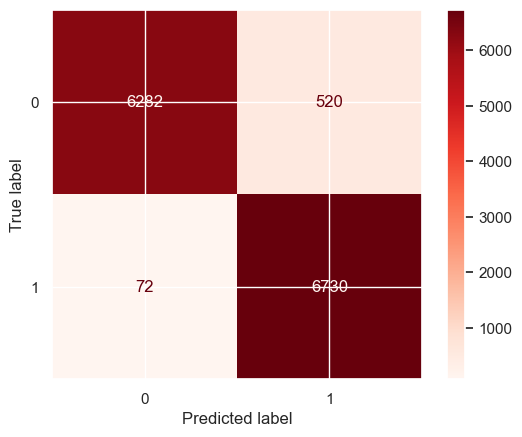

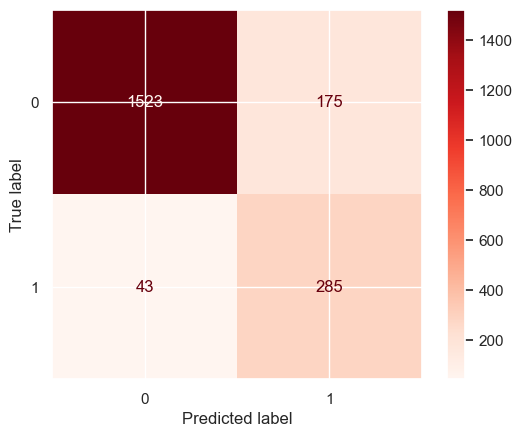

In [50]:
# Evaluate the knn_pipe performance on train set
y_pred_train_knn = knn_pipe.predict(X_train_final)

# Evaluate the knn_pipe performance on test set
y_pred_test_knn = knn_pipe.predict(X_test_capped)

# Print Classification Report to see all evaluation metrics for classification
print("KNN Report : ")
print(classification_report(y_train_final,y_pred_train_knn))
print('')
print("KNN Report : ")
print(classification_report(y_test,y_pred_test_knn))
print('')

# Show Confusion Matrix
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_pipe, X_train_final, y_train_final, cmap='Reds'))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_pipe, X_test_capped, y_test, cmap='Reds'))

As explained above we will only be looking at the recall because we wanto minimize the false negative, and since we are focusing on the negative (1) we are going to look at the result for 1.

based on the result we can see the recall between train and test is around 11% and the model is overfit(large train low test)

the confusion matrix shows that 74 are considered false negative on the train set and 41 are considered false negative on the test set.

### 9.2 SVM

SVM Report : 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      6802
           1       0.93      0.96      0.95      6802

    accuracy                           0.95     13604
   macro avg       0.95      0.95      0.95     13604
weighted avg       0.95      0.95      0.95     13604


SVM Report : 
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1698
           1       0.68      0.86      0.76       328

    accuracy                           0.91      2026
   macro avg       0.82      0.89      0.85      2026
weighted avg       0.92      0.91      0.91      2026


Confusion Matrix      : 
Confusion Matrix      : 


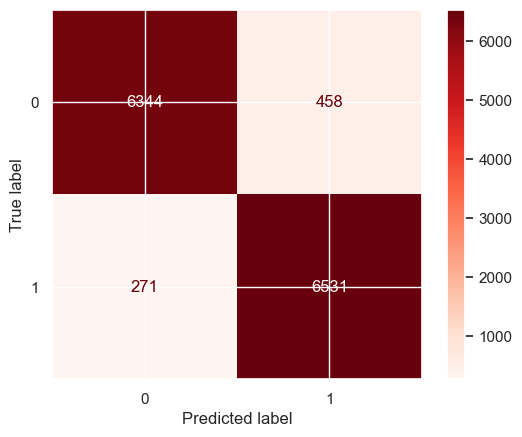

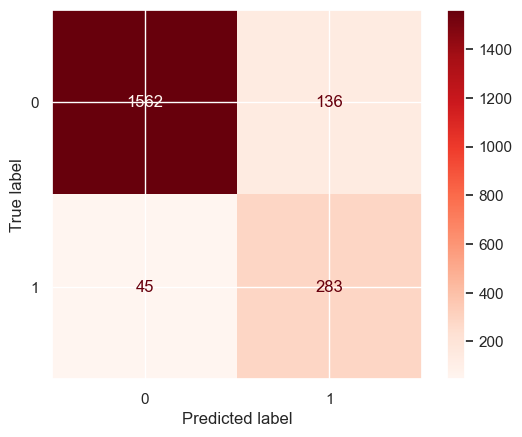

In [51]:
# Evaluate the svm_pipe performance on train set
y_pred_train_svm = svm_pipe.predict(X_train_final)

# Evaluate the svm_pipe performance on test set
y_pred_test_svm = svm_pipe.predict(X_test_capped)

# Print Classification Report to see all evaluation metrics for classification
print("SVM Report : ")
print(classification_report(y_train_final,y_pred_train_svm))
print('')
print("SVM Report : ")
print(classification_report(y_test,y_pred_test_svm))
print('')

# Show Confusion Matrix
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_pipe, X_train_final, y_train_final, cmap='Reds'))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_pipe, X_test_capped, y_test, cmap='Reds'))

As explained above we will only be looking at the recall because we wanto minimize the false negative, and since we are focusing on the negative (1) we are going to look at the result for 1.

based on the result we can see the recall between train and test is around 10% and the model is overfit(large train low test)

the confusion matrix shows that 260 are considered false negative on the train set and 45 are considered false negative on the test set.

### 9.3 Decision Tree

Decision Tree Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6802
           1       1.00      1.00      1.00      6802

    accuracy                           1.00     13604
   macro avg       1.00      1.00      1.00     13604
weighted avg       1.00      1.00      1.00     13604


Decision Tree Report : 
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1698
           1       0.72      0.83      0.77       328

    accuracy                           0.92      2026
   macro avg       0.84      0.88      0.86      2026
weighted avg       0.93      0.92      0.92      2026


Confusion Matrix      : 
Confusion Matrix      : 


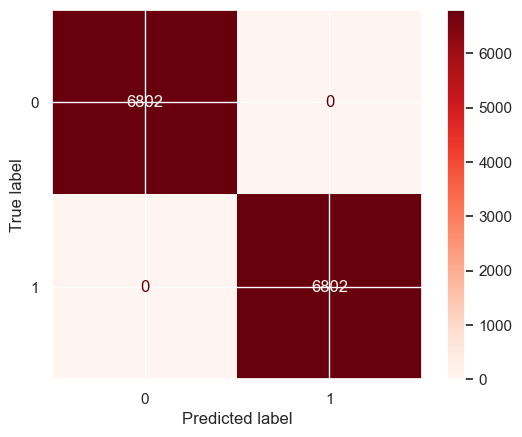

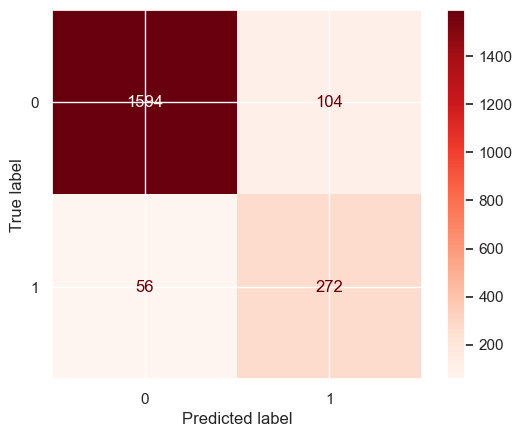

In [52]:
# Evaluate the decision_tree_pipe performance on train set
y_pred_train_decision_tree = decision_tree_pipe.predict(X_train_final)

# Evaluate the decision_tree_pipe performance on test set
y_pred_test_decision_tree = decision_tree_pipe.predict(X_test_capped)

# Print Classification Report to see all evaluation metrics for classification
print("Decision Tree Report : ")
print(classification_report(y_train_final,y_pred_train_decision_tree))
print('')
print("Decision Tree Report : ")
print(classification_report(y_test,y_pred_test_decision_tree))
print('')

# Show Confusion Matrix
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(decision_tree_pipe, X_train_final, y_train_final, cmap='Reds'))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(decision_tree_pipe, X_test_capped, y_test, cmap='Reds'))

As explained above we will only be looking at the recall because we wanto minimize the false negative, and since we are focusing on the negative (1) we are going to look at the result for 1.

based on the result we can see the recall between train and test is around 18% which is a large difference and the model is overfit(large train low test)

the confusion matrix shows that 0 are considered false negative on the train set and 60 are considered false negative on the test set.

### 9.4 Random Forest

Random Forest Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6802
           1       1.00      1.00      1.00      6802

    accuracy                           1.00     13604
   macro avg       1.00      1.00      1.00     13604
weighted avg       1.00      1.00      1.00     13604


Random Forest Report : 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1698
           1       0.80      0.88      0.84       328

    accuracy                           0.94      2026
   macro avg       0.89      0.92      0.90      2026
weighted avg       0.95      0.94      0.95      2026


Confusion Matrix      : 
Confusion Matrix      : 


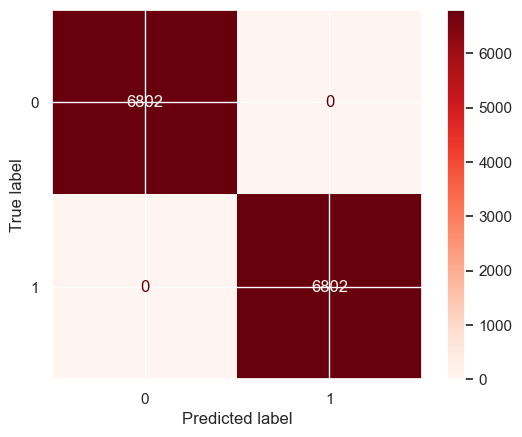

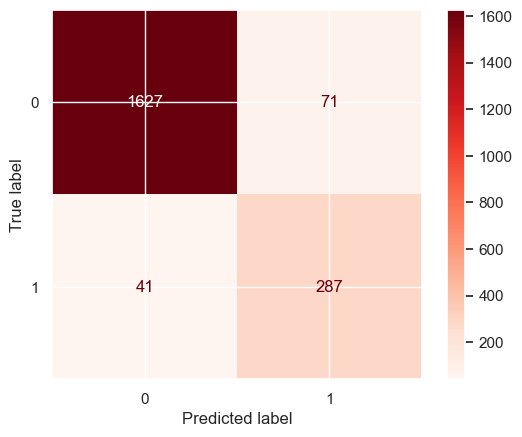

In [53]:
# Evaluate the random_forest_pipe performance on train set
y_pred_train_random_forest = random_forest_pipe.predict(X_train_final)

# Evaluate the random_forest_pipe performance on test set
y_pred_test_random_forest = random_forest_pipe.predict(X_test_capped)

# Print Classification Report to see all evaluation metrics for classification
print("Random Forest Report : ")
print(classification_report(y_train_final,y_pred_train_random_forest))
print('')
print("Random Forest Report : ")
print(classification_report(y_test,y_pred_test_random_forest))
print('')

# Show Confusion Matrix
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(random_forest_pipe, X_train_final, y_train_final, cmap='Reds'))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(random_forest_pipe, X_test_capped, y_test, cmap='Reds'))

As explained above we will only be looking at the recall because we wanto minimize the false negative, and since we are focusing on the negative (1) we are going to look at the result for 1.

based on the result we can see the recall between train and test is around 12% and the model is overfit(large train low test)

the confusion matrix shows that 0 are considered false negative on the train set and 39 are considered false negative on the test set.

### 9.5 Boosting

Boosting Report : 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      6802
           1       0.97      0.98      0.97      6802

    accuracy                           0.97     13604
   macro avg       0.97      0.97      0.97     13604
weighted avg       0.97      0.97      0.97     13604


Boosting Report : 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1698
           1       0.79      0.90      0.84       328

    accuracy                           0.95      2026
   macro avg       0.89      0.93      0.90      2026
weighted avg       0.95      0.95      0.95      2026


Confusion Matrix      : 
Confusion Matrix      : 


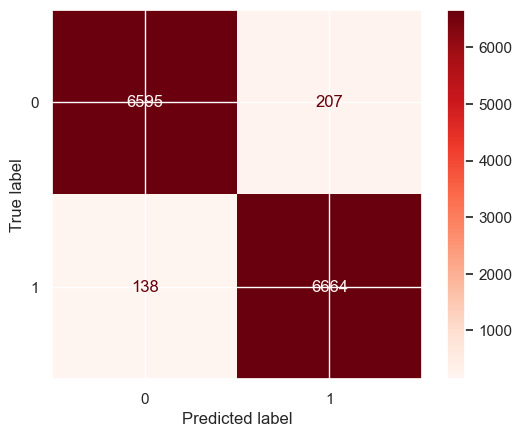

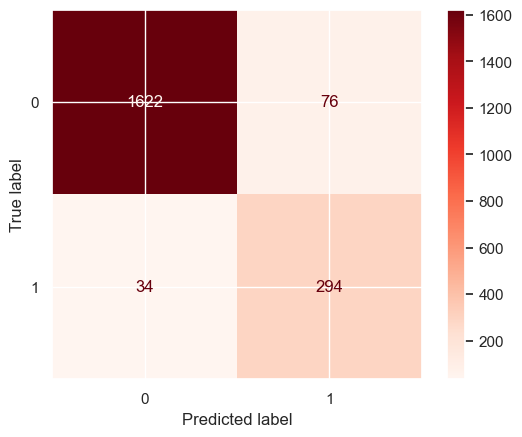

In [54]:
# Evaluate the boosting_pipe performance on train set
y_pred_train_boosting = boosting_pipe.predict(X_train_final)

# Evaluate the boosting_pipe performance on test set
y_pred_test_boosting = boosting_pipe.predict(X_test_capped)

# Print Classification Report to see all evaluation metrics for classification
print("Boosting Report : ")
print(classification_report(y_train_final,y_pred_train_boosting))
print('')
print("Boosting Report : ")
print(classification_report(y_test,y_pred_test_boosting))
print('')

# Show Confusion Matrix
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(boosting_pipe, X_train_final, y_train_final, cmap='Reds'))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(boosting_pipe, X_test_capped, y_test, cmap='Reds'))

As explained above we will only be looking at the recall because we wanto minimize the false negative, and since we are focusing on the negative (1) we are going to look at the result for 1.

based on the result we can see the recall between train and test is around 8% and the model is overfit(large train low test), this recall is the lowest comapared to other models.

the confusion matrix shows that 133 are considered false negative on the train set and 32 are considered false negative on the test set.

In [55]:
# Assuming you have five pipelines: knn_pipe, svm_pipe, decision_tree_pipe, random_forest_pipe, boosting_pipe
pipelines = {'knn': knn_pipe, 'svm': svm_pipe, 'decision_tree': decision_tree_pipe, 
             'random_forest': random_forest_pipe, 'boosting': boosting_pipe}

# Create an empty DataFrame to store recall values
recall_df = pd.DataFrame(index=pipelines.keys(), columns=['Recall Train', 'Recall Test'])

# Loop through each pipeline and calculate recall for train and test sets
for model_name, pipeline in pipelines.items():
    # Evaluate the model performance on train set
    y_pred_train = pipeline.predict(X_train_final)
    
    # Evaluate the model performance on test set
    y_pred_test = pipeline.predict(X_test_capped)
    
    # Calculate recall for train and test sets
    recall_train = recall_score(y_train_final, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    
    # Store recall values in the DataFrame
    recall_df.at[model_name, 'Recall Train'] = recall_train
    recall_df.at[model_name, 'Recall Test'] = recall_test

# Display the DataFrame
recall_df

,Recall Train,Recall Test
knn,0.989415,0.868902
svm,0.960159,0.862805
decision_tree,1.0,0.829268
random_forest,1.0,0.875
boosting,0.979712,0.896341


**Model Evaluation Summary :**

Based on the compiled recall we can say :
- Random forest recall is really good, when compared to the test it is overfiting with a difference of about 12 %
- Decision Tree is really good, when compared to the test it is overfiting with a difference of about 18 %
- knn and svm also has a really good recall on the train but compared to the test it is overfiting with a difference of about 10%
- Boosting also has a really good recall on the train but compared to the test it is overfiting with a difference of about 8 %.

**Based on the data above we can say that the best model for now is boosting. we will confirm again using cross validation to validate out findings.**

## 10. Cross Validation

### 10.1 KNN

In [56]:
# Cross Validation using `cross_val_score`

recall_train_cross_val_knn = cross_val_score(knn_pipe,
                                     X_train_final,
                                     y_train_final,
                                     cv=5,
                                     scoring="recall")

# Show Cross validation Report
print('Recall - All - Cross Validation  : ', recall_train_cross_val_knn)
print('Recall - Mean - Cross Validation : ', recall_train_cross_val_knn.mean())
print('Recall - Std - Cross Validation  : ', recall_train_cross_val_knn.std())
print('Recall - Range of Test-Set       : ', (recall_train_cross_val_knn.mean()-recall_train_cross_val_knn.std()) , '-', (recall_train_cross_val_knn.mean()+recall_train_cross_val_knn.std()))

Recall - All - Cross Validation  :  [0.95294118 0.98455882 0.98236591 0.98016165 0.97867647]
Recall - Mean - Cross Validation :  0.975740804771578
Recall - Std - Cross Validation  :  0.011572678689120364
Recall - Range of Test-Set       :  0.9641681260824576 - 0.9873134834606984


Based on the all Cross validation after 5 folds we can say that:

It is very stable after the second fold consistently staying around 0.98 but lowers to 0.97 at the end.

### 10.2 SVM

In [57]:
# Cross Validation using `cross_val_score`

recall_train_cross_val_svm = cross_val_score(svm_pipe,
                                     X_train_final,
                                     y_train_final,
                                     cv=5,
                                     scoring="recall")

# Show Cross validation Report
print('Recall - All - Cross Validation  : ', recall_train_cross_val_svm)
print('Recall - Mean - Cross Validation : ', recall_train_cross_val_svm.mean())
print('Recall - Std - Cross Validation  : ', recall_train_cross_val_svm.std())
print('Recall - Range of Test-Set       : ', (recall_train_cross_val_svm.mean()-recall_train_cross_val_svm.std()) , '-', (recall_train_cross_val_svm.mean()+recall_train_cross_val_svm.std()))

Recall - All - Cross Validation  :  [0.90220588 0.95882353 0.96914034 0.96840558 0.95882353]
Recall - Mean - Cross Validation :  0.9514797726585122
Recall - Std - Cross Validation  :  0.025036599026251008
Recall - Range of Test-Set       :  0.9264431736322613 - 0.9765163716847632


Based on the all Cross validation after 5 folds we can say that:

It is quite stable but lowers and stays around 0.96.

### 10.3 Decision Tree

In [58]:
# Cross Validation using `cross_val_score`

recall_train_cross_val_decision_tree = cross_val_score(decision_tree_pipe,
                                     X_train_final,
                                     y_train_final,
                                     cv=5,
                                     scoring="recall")

# Show Cross validation Report
print('Recall - All - Cross Validation  : ', recall_train_cross_val_decision_tree)
print('Recall - Mean - Cross Validation : ', recall_train_cross_val_decision_tree.mean())
print('Recall - Std - Cross Validation  : ', recall_train_cross_val_decision_tree.std())
print('Recall - Range of Test-Set       : ', (recall_train_cross_val_decision_tree.mean()-recall_train_cross_val_decision_tree.std()) , '-', (recall_train_cross_val_decision_tree.mean()+recall_train_cross_val_decision_tree.std()))

Recall - All - Cross Validation  :  [0.86029412 0.97058824 0.96840558 0.96840558 0.96911765]
Recall - Mean - Cross Validation :  0.9473622336517267
Recall - Std - Cross Validation  :  0.043541353189935884
Recall - Range of Test-Set       :  0.9038208804617908 - 0.9909035868416626


Based on the all Cross validation after 5 folds we can say that:

It is quite stable but lowers and stays around 97% to 0.96.

### 10.4 Random Forest

In [59]:
# Cross Validation using `cross_val_score`

recall_train_cross_val_random_forest = cross_val_score(random_forest_pipe,
                                     X_train_final,
                                     y_train_final,
                                     cv=5,
                                     scoring="recall")

# Show Cross validation Report
print('Recall - All - Cross Validation  : ', recall_train_cross_val_random_forest)
print('Recall - Mean - Cross Validation : ', recall_train_cross_val_random_forest.mean())
print('Recall - Std - Cross Validation  : ', recall_train_cross_val_random_forest.std())
print('Recall - Range of Test-Set       : ', (recall_train_cross_val_random_forest.mean()-recall_train_cross_val_random_forest.std()) , '-', (recall_train_cross_val_random_forest.mean()+recall_train_cross_val_random_forest.std()))

Recall - All - Cross Validation  :  [0.92941176 0.99558824 0.99265246 0.99485672 0.99264706]
Recall - Mean - Cross Validation :  0.9810312486493495
Recall - Std - Cross Validation  :  0.025836409797472662
Recall - Range of Test-Set       :  0.9551948388518768 - 1.0068676584468221


Based on the all Cross validation after 5 folds we can say that:

It is very stable after the second fold consistently staying around 0.99.

### 10.5 Boosting

In [60]:
# Cross Validation using `cross_val_score`

recall_train_cross_val_boosting = cross_val_score(boosting_pipe,
                                     X_train_final,
                                     y_train_final,
                                     cv=5,
                                     scoring="recall")

# Show Cross validation Report
print('Recall - All - Cross Validation  : ', recall_train_cross_val_boosting)
print('Recall - Mean - Cross Validation : ', recall_train_cross_val_boosting.mean())
print('Recall - Std - Cross Validation  : ', recall_train_cross_val_boosting.std())
print('Recall - Range of Test-Set       : ', (recall_train_cross_val_boosting.mean()-recall_train_cross_val_boosting.std()) , '-', (recall_train_cross_val_boosting.mean()+recall_train_cross_val_boosting.std()))

Recall - All - Cross Validation  :  [0.88308824 0.98455882 0.98457017 0.98677443 0.98897059]
Recall - Mean - Cross Validation :  0.9655924493235943
Recall - Std - Cross Validation  :  0.04128446738258895
Recall - Range of Test-Set       :  0.9243079819410054 - 1.0068769167061833


Based on the all Cross validation after 5 folds we can say that:

It is very stable after the second fold consistently staying around 0.98.

**Sumarry:**

Based on the cross validation and model evaluation.

we can consider random forest and boosting having the most stable results consistently staying at 0.99 and 0.98 respectively.

but comapared to the model evaluation boosting is far more better although it is overfit we can say that **boosting is better due to the fact that the difference between train and test is 8% which is 4% higher than random forest.**

## 11. Hyperparameter Tuning

### 11.1 Boosting Hyperparameter Tuning

In [61]:
# Define hyperparameters and their possible values for tuning
param_grid = {
    'modeling__n_estimators': [50, 100, 200],
    'modeling__loss': ['deviance', 'exponential'],
    'modeling__learning_rate': [0.01, 0.1, 0.2],
    'modeling__criterion': ['friedman_mse', 'squared_error'],
    'modeling__max_depth': [3, 4, 5],
    'modeling__min_samples_split': [2, 5, 10],
    'modeling__min_samples_leaf': [1, 2, 4]
}

# Create a RandomizedSearchCV object
grid_search = RandomizedSearchCV(estimator=boosting_pipe, param_distributions=param_grid, cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV to the data
grid_search.fit(X_train_final, y_train_final)

# Print the best hyperparameters found
print('')
print("Best Hyperparameters:", grid_search.best_params_)


c:\Users\Irsyad\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.95207358 0.97317036 0.95192636
 0.91076164 0.97287646        nan 0.97030368]
  warnings.warn(



Best Hyperparameters: {'modeling__n_estimators': 200, 'modeling__min_samples_split': 10, 'modeling__min_samples_leaf': 1, 'modeling__max_depth': 5, 'modeling__loss': 'exponential', 'modeling__learning_rate': 0.2, 'modeling__criterion': 'friedman_mse'}


Best parameter has been made.

In [62]:
# Save best parameter into the pipeline
best_grid_model = grid_search.best_estimator_

# Show Best parameter pipeline
best_grid_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Gender',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1'])])),
                ('modeling',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            loss='exponential', max_depth=5,
                                            min_samples_split=10,
                                            n_estimators=200))])

Hyperparamter tuning has been compleated, **some data are failed due to the fact that there are some parameters that does not work with other parameters**, thus some hyperparameter failed to be compleated.

**The reason why we use randomizedsearchCV is because it requires less computer power/ram to run, and can be run more smoothly than before.**

based on the hyperparameter tuning we have gathered that the best parameters are as follow:

Best Hyperparameters: 
- 'classifier__n_estimators': 200, 
- 'classifier__min_samples_split': 5, 
- 'classifier__min_samples_leaf': 4, 
- 'classifier__max_depth': 4, 
- 'classifier__loss': 'exponential', 
- 'classifier__learning_rate': 0.2, 
- 'classifier__criterion': 'friedman_mse'

### 11.2 Boosting Hyperparameter Tuning Evaluation

Boosting 2 Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6802
           1       1.00      1.00      1.00      6802

    accuracy                           1.00     13604
   macro avg       1.00      1.00      1.00     13604
weighted avg       1.00      1.00      1.00     13604


Boosting 2 Report : 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1698
           1       0.84      0.89      0.86       328

    accuracy                           0.95      2026
   macro avg       0.91      0.93      0.92      2026
weighted avg       0.96      0.95      0.95      2026


Confusion Matrix      : 
Confusion Matrix      : 


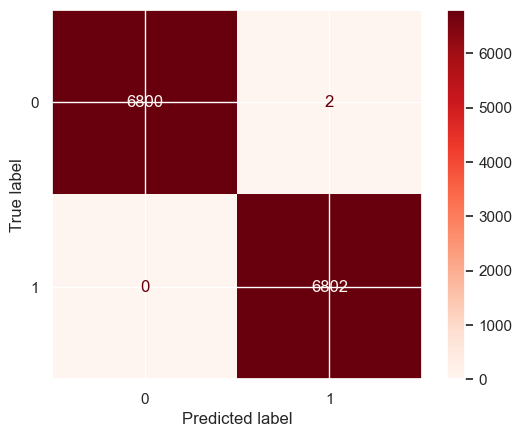

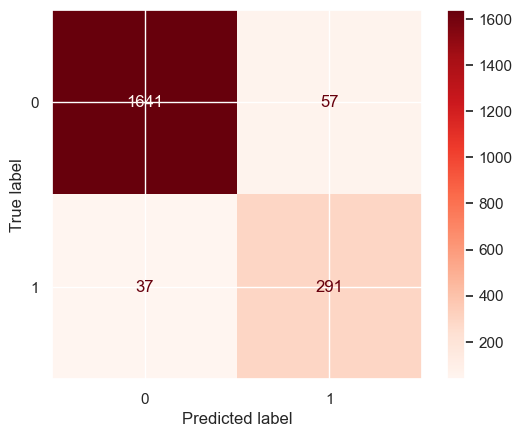

In [63]:
# Evaluate the best_grid_model performance on train set
y_pred_train_boosting2 = best_grid_model.predict(X_train_final)

# Evaluate the best_grid_model performance on test set
y_pred_test_boosting2 = best_grid_model.predict(X_test_capped)

# Print Classification Report to see all evaluation metrics for classification
print("Boosting 2 Report : ")
print(classification_report(y_train_final,y_pred_train_boosting2))
print('')
print("Boosting 2 Report : ")
print(classification_report(y_test,y_pred_test_boosting2))
print('')

# Show Confusion Matrix
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_grid_model, X_train_final, y_train_final, cmap='Reds'))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_grid_model, X_test_capped, y_test, cmap='Reds'))

We can see from the data above that:

- Compared to the recall from there are no significatn difference between the two.

- Before tuning shows the data has a lower train then after tuning

- They both have the same number in the test set which is 89%

- the distance between false negative and false positive is less in after tuning than before tuning (can be seen the on the confusion matrix).


based on the above analysis we can say that **we will be using the best parameter/after hyperparamter tuning.**

In [64]:
# Cross Validation using `cross_val_score`

recall_train_cross_val_boosting2 = cross_val_score(best_grid_model,
                                     X_train_final,
                                     y_train_final,
                                     cv=5,
                                     scoring="recall")

# Show Cross Validation Report
print('Recall - All - Cross Validation  : ', recall_train_cross_val_boosting2)
print('Recall - Mean - Cross Validation : ', recall_train_cross_val_boosting2.mean())
print('Recall - Std - Cross Validation  : ', recall_train_cross_val_boosting2.std())
print('Recall - Range of Test-Set       : ', (recall_train_cross_val_boosting2.mean()-recall_train_cross_val_boosting2.std()) , '-', (recall_train_cross_val_boosting2.mean()+recall_train_cross_val_boosting2.std()))

Recall - All - Cross Validation  :  [0.86617647 0.99705882 0.99706098 0.99338722 0.99485294]
Recall - Mean - Cross Validation :  0.9697072870294333
Recall - Std - Cross Validation  :  0.051784175566695165
Recall - Range of Test-Set       :  0.9179231114627382 - 1.0214914625961284


Futher confirming model strength using cross validation, we can say that it even more stable than the base model. where the model stays consistent at 0.99 from the second fold to the last.

## 12. Model Saving

In [65]:
# Saving model as model.pkl
with open('model.pkl', 'wb') as model:
  pickle.dump(best_grid_model,model)

model.pkl has been saved and will be used in deployment and model inference

## 13. Model Inference

Model inference will be conducted in the P1M2_Muhammad_Irsyad_inf.ipynb file.

## 14. Conclusion

### EDA and Bussines Insight

Based on the EDA we can gather that :

- Attrition :
  - There are more users that still use our credit card compared to attrited customers.

  - around 16.1% of users that are attrited compared to the 83.9% that are with us.
  
  - Data is proved to be imbalanced.

- Age :
  - Age is normally distributed, with the most users being aroung 48 years old and the least being above 60.

  - Majority of users are still using our service, around 16% - 25% of each age group are attributed.

  Bussines Insight: 
  - We can provide financial stability anfd planning, people at the age of 40 to 50 usualy prioritize financial stability and planning become more important  thus we can provide them with the necessary assistance.

  - Long term reward benefits can be given to users that has been with as for a long period of time which can reduce potential churn rate.

- Dependancy Count : 

  Dependant_Count refers to the number of people who are financialy dependant to the user (example a father with two kids has a dependant count of 2 or 3 ( 3 if the wife is included)).

  Based in the graph abive we can say that :

  - Majority of your users has a dependancy of around 2 or 3 people and the least being 5 dependence count.
  - Majority of users are still using our service, around 16% - 25% of each dependence group are attributed/churn

  Bussiness Insight :
  
  - We can provide family oriented services towards users that has a dependancy of 1 or higher like a joint accoutn to reduce churn rate
  - A reward program that i family oriented like educational resources, financial planning tools, ect.

- Inactivity within 12 Months : 

  - users are still in contact with use around 2 - 3 months with the highest being 3 months
  - there are almost no users around 1 which means that they are still in contact with us on after the frist month.
  - around 3 moths the attrition is at it's highest at 8.2%.

- Contact with bank within 12 Months : 

  - users are still in contact with use around 2 - 3 months with the highest being 2 months
  - there are no users around 6 and later months.
  - around 3 moths the attrition is at it's highest at 6.7%.

Bussines insght:
  - users contact banks to seek result/answer regarding our credit cards, we can increase ourr customer services in order to lower customer churn.

-  Months on Book :

  - most users has been with us for over 30 months (more than 2 -3 years).
  - Attrition is higer around the months of 30 to 39.

Bussines Insight:

  - the same as the age we can give long term users award based on how long they gav been with us.
  - Financialy consulting for long term users.

- Gender : 

  - There are 3.8 more females than there are male.
  - both gender are quite evenly distributed with females having a higher attrition comapred to males by 1.2%.

- Education Level : 

  - Majority of users are around high school, graduate, and uneducated with the most being graduate.
  - majority of our users makes less then 40K.
  - Unknown catagory will be randomly imputated during missing value handling.

  Bussiness Insight:
  
  - We cam give give financial counceling to high school and uneducated users so they can be more financially stable and lower churn rate.

- Income Catagory : 

  - majority of our users makes less then 40K.
  - Unknown catagory will be randomly imputated during missing value handling.
  - arounf 2 to 6 % of each demograpich attributed/churn

Bussiness Insight:

  - We cam give give financial counceling to those that make less than 40K.
  - we can give some leniency for user that make less than 60K to pay of their credit card.

#### Model Evaluation and Cross Validation

The metric we will be using is the recall metric. the reason why we are using the recall metric is because we want to effectively identifying most of the customers who are likely to churn. Although percision is also important we will focus on recall for this model evaluation. Below are the recall results from both train and test:


| Model          | Recall Train | Recall Test | CV Fold 1  | CV Fold 2  | CV Fold 3  | CV Fold 4  | CV Fold 5  |
|----------------|--------------|-------------|------------|------------|------------|------------|------------|
| knn            |   0.989268   |   0.859756  |    0.95    | 0.98161765 | 0.98677443 | 0.98530492 | 0.97647059 |
| svm            |   0.963393   |   0.853659  | 0.89411765 | 0.96911765 | 0.96987509 | 0.96326231 | 0.96397059 |
| decision_tree  |   1.0        |   0.835366  | 0.86470588 | 0.96838235 | 0.97207935 | 0.96840558 | 0.97058824 |
| random_forest  |   1.0        |   0.865854  | 0.91764706 | 0.99485294 | 0.99559148 | 0.99265246 | 0.99411765 |
| boosting       |   0.977801   |   0.908537  | 0.87867647 | 0.98455882 | 0.98530492 | 0.98457017 |   0.9875   |

Model Evaluation result

1. **KNearestNeighbour (KNN)**
  - KNN is a simple and intuitive algorithm that classifies data points based on the majority class of their k-nearest neighbors in the feature space. In this case, it demonstrates a high recall on the training set, indicating its ability to capture the underlying patterns. However, there's a slight drop in performance on the test set, suggesting a potential for overfitting.

2. **Support Vector Machine (SVM)**
  - SVM is a powerful classification algorithm that works by finding the optimal hyperplane to separate different classes. It achieves a strong recall on the training set but exhibits a modest drop on the test set. The cross-validation scores show variability, suggesting the model's sensitivity to different subsets of the data.

3. **Decision Tree**
  - Decision trees are tree-like structures where each internal node represents a decision based on a feature, leading to a final class prediction at the leaves. The model achieves perfect recall on the training set but experiences a decline on the test set, indicating potential overfitting. Cross-validation results show variability across different folds.

4. **Random Forest**
  - Random Forest is an ensemble method that builds multiple decision trees and combines their predictions. Like the decision tree, it achieves perfect recall on the training set. However, it generalizes well on the test set, showcasing its ability to mitigate overfitting. Cross-validation scores consistently demonstrate robust performance.

5. **Boosting**
  - Boosting is an ensemble technique that combines weak learners to create a strong learner. This model achieves good recall on both training and test sets, showcasing a balanced trade-off between capturing patterns in the training data and generalizing to new data. Cross-validation results highlight the model's consistent and robust performance across different data subsets.

After assesing the evaluations, all of the models work well with the data with some having a few tradeoffs.  The decision tree and random forest models achieve perfect recall on the training set, but their test set performance shows a large overfitting. Boosting model shows good generalization across different folds. and comparing all the train and test set we can say **Boosting is the best model for this prediction** with the lowest difference in the train test recall of 8 % while other models have a difference of 10% and above.




### Model Improvement

Although this model is very good, there is always room for improvement, which can be done by :

- increasing the numbers of features that correlates with the label
- hyperparameter tuning using gridsearchCV instead of randomsearchCV
- alternatif model evaluation and feature selection using other means than correlation and feature of importance such as the feature selection liblary.

### Overall Summary

Based on the comperhensive exploratory data analysis (EDA) and model evaluation, it is evident that **Boosting after hpyerparamter tunning emerges as the most optimal choice to predict attired users in the given dataset.** The EDA insight shows some insight regarding our demographic and their activity of 12 months of this data has been collected which can give as a lot of bussiness insight. Such as giving reward system that base on how active and how long they have been using our services as well as giving financial consultinh towards those that has low income and a lot of depeneces.

Regarding the model that shows the best which os boosting after conducting hyperparameter tuning, we can see the recall difference between tran and test of 12% although it is higher we can see a more significant decreese in the false negative value on the confusion matrix and an increase in stability on the cross validation. Moving forward, ufrther experimentation could be done by either increasing the numbers of features and hyperparameter tuning using grid search instead of randomsearchCV, alternatif model evaluation and feature selection using other means than correlation and feature of importance such as the feature selection liblary.

## 15. Conceptual Problems:

#### Question 1:

Explain the background/reason there is bagging and how it works?

#### Answer:

Bagging is short for Boostrap Aggregating, it is an **ensamble learning technique designed to improve the stability and performance of a machine learning model**. Bagging reduceds the variance of amodel by training multiple instances of the model on different subsets of the training data and then combine their prediction.

In short :
1. Varaince reduction : High variance models can be sensitive to small fluctuations in the training data, leading to overfitting. Bagging aims to reduce variance by introducing diversity among the models.

2. Bootstrap sampling : Random sampling drawn from the original dataset with different instances and variation.

How it Works:
1. Bootstrap sampling :Random sampling drawn from the original dataset with different instances and variation.

2. Model Training: A base model (Random forest, decision tree, ect) is trained on each of the bootstrap samples independent;y/ since each sample is slightly different the result will be different.

3. prediction aggregation: After each model sample has been trained. a perdition is made on a new/unseen data using each model. the final prediction is then aggregated ny typically averaging the prediction for regression (mean) and taking the majority for classification (mode)

#### Question 2:

Explain the difference of how the random forest algorithm and boosting algorithm that you have used here!

#### Answer: 
In this model i am using GradientBoostingClassifier

Both are ensamble learning techniques but each has a different approach.

Model Building:
- Random Forest builds an ensemble of decision trees as base models the decision trees are formed in paralel and independantly. On the other hand Gradient Boosting builds an ensemble of weak learners, often decision trees, sequentially.

- Random forest makes as subset of each data after training obtained from bootstrap sampling. On the other hand Gradient Boosting uses weighted data that were assigned from each tree and is trained to correct the mistakes.

prediction:
- For classification tasks, Random Forest combines the predictions of individual trees by either taking a majority vote (for binary classification) or averaging the probabilities (for multiclass classification). On the other Hand gradientboosting predictions of individual trees are combined with weights assigned based on their performance. Trees that contribute more to reducing errors are given higher weights.

**Summary:**
- Random forest is works in paralel to other samples gradient boosting works sequentialy
- Random Forest aggregates the results while Gradientboosting uses weighted data that aimes to correct errors
- Random forest is more compurarionally efficient comapred to gradient boosing because random forest works in paralel gradientboosting is sequential


#### Question 3:

Explain what is cross validation?

#### Answer:

Cross validation is a technique to asses the performance of a predictiver model (be it classification or regression) to estimate the models performance by looking into their overall cross validation, mean, and standard deviasion. It is done by splitting the dataset into multiple subsets (folds), the model is trained on a portion of the data (training set) and then tested on the remaining portion (validation set). and can be doine multiple times depending on how much you want ( in this notebook i did 5 because the result can be seen more stable compared to 3 folds).

the steps are as follow:
1. Randomly split your entire train set into k number of folds (subsets).
2. For each fold in your train set, build your model on cv–1 folds of the train set. Then, test the model against validation set to check the effectiveness for n-th fold.
3. Repeat these 2 steps until each of the k-folds has served as the validation set.
4. The average of your k accuracy is called the Cross Validation accuracy and will serve as your performance metric for the model.



